## Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
df = pd.read_csv('../data/kaggle_survey_2017_2021.csv.zip', header=[0, 1])

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/1276501630.py:1: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,

## 0: Understanding the survey

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106301 entries, 0 to 106300
Columns: 293 entries, ('-', 'Year') to ('Q38_B_OTHER', 'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other')
dtypes: float64(1), int64(1), object(291)
memory usage: 237.6+ MB


In [4]:
df.head()

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Neptune.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,2021,910.0,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,784.0,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,2021,924.0,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
3,2021,575.0,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,2021,781.0,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
q_num_to_questions_dict = dict(df.columns)
q_num_to_questions_dict

{'-': 'Year',
 'Time from Start to Finish (seconds)': 'Duration (in seconds)',
 'Q1': 'What is your age (# years)?',
 'Q2': 'What is your gender? - Selected Choice',
 'Q3': 'In which country do you currently reside?',
 'Q4': 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
 'Q5': 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
 'Q6': 'For how many years have you been writing code and/or programming?',
 'Q7_Part_1': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python',
 'Q7_Part_2': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R',
 'Q7_Part_3': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL',
 'Q7_Part_4': 'What programming languages do you use on a regular basis? (Select all that apply) - S

Understanding the survey findings:
1. There are 42 questions in the questionaire.
2. Some questions have multiple options to choose from. (Select all that apply)
3. Some questions have single option to choose from. (Choose one from the list)

In [6]:
# how many questions are asked:
question_to_response_and_topic = {}
for question_num_str, question in q_num_to_questions_dict.items():
    # group Q12new as part of Q12, edge case
    question_num = question_num_str.split('_')[0].replace('Q', '').replace('new', '')
    if question_num not in question_to_response_and_topic:
        question_to_response_and_topic[question_num] = {'max_response_count': 1, 'multiple_options_selectable': 0}
    else:
        question_to_response_and_topic[question_num]['max_response_count'] += 1
        
    if '(Select all that apply)' in question:
        question_to_response_and_topic[question_num]['multiple_options_selectable'] = 1
        choice = question.split('Selected Choice - ')[-1].strip()
        if 'choices' in question_to_response_and_topic[question_num]:
            question_to_response_and_topic[question_num]['choices'] += [choice]
        else:
            question_to_response_and_topic[question_num]['choices'] = [choice]
    question_str = question.split('(Select all that apply)')[0].strip()
    if 'question' not in question_to_response_and_topic[question_num]:
            question_to_response_and_topic[question_num]['question'] = question_str
    if 'columns' not in question_to_response_and_topic[question_num]:
        question_to_response_and_topic[question_num]['columns'] = [question_num_str]
    else:
        question_to_response_and_topic[question_num]['columns'] += [question_num_str]

In [7]:
questionnaire = pd.DataFrame(question_to_response_and_topic).T
questionnaire = questionnaire.sort_values(by='max_response_count', ascending=False).reset_index().rename({'index':'Q'}, axis=1)
# Display the DataFrame with expanded column width
pd.set_option('display.max_colwidth', None)
questionnaire

,Q,max_response_count,multiple_options_selectable,question,columns,choices
0,32,30,1,"Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?","[Q32_A_Part_1, Q32_A_Part_2, Q32_A_Part_3, Q32_A_Part_4, Q32_A_Part_5, Q32_A_Part_6, Q32_A_Part_7, Q32_A_Part_8, Q32_A_Part_11, Q32_A_Part_14, Q32_A_Part_15, Q32_A_Part_16, Q32_A_Part_17, Q32_A_Part_20, Q32_A_OTHER, Q32_B_Part_1, Q32_B_Part_2, Q32_B_Part_3, Q32_B_Part_4, Q32_B_Part_5, Q32_B_Part_6, Q32_B_Part_7, Q32_B_Part_8, Q32_B_Part_11, Q32_B_Part_13, Q32_B_Part_15, Q32_B_Part_16, Q32_B_Part_17, Q32_B_Part_20, Q32_B_OTHER]","[MySQL, PostgreSQL, SQLite, Oracle Database, MongoDB, Snowflake, IBM Db2, Microsoft SQL Server, Amazon Redshift, Amazon DynamoDB, Google Cloud BigQuery, Google Cloud SQL, Google Cloud Firestore, None, Other, MySQL, PostgreSQL, SQLite, Oracle Database, MongoDB, Snowflake, IBM Db2, Microsoft SQL Server, Amazon Redshift, Amazon DynamoDB, Google Cloud BigQuery, Google Cloud SQL, Google Cloud Firestore, None, Other]"
1,34,28,1,Which of the following business intelligence tools do you use on a regular basis?,"[Q34_A_Part_1, Q34_A_Part_2, Q34_A_Part_3, Q34_A_Part_4, Q34_A_Part_5, Q34_A_Part_6, Q34_A_Part_8, Q34_A_Part_9, Q34_A_Part_10, Q34_A_Part_11, Q34_A_Part_12, Q34_A_Part_13, Q34_A_Part_16, Q34_A_OTHER, Q34_B_Part_1, Q34_B_Part_2, Q34_B_Part_3, Q34_B_Part_4, Q34_B_Part_5, Q34_B_Part_6, Q34_B_Part_8, Q34_B_Part_9, Q34_B_Part_10, Q34_B_Part_11, Q34_B_Part_12, Q34_B_Part_13, Q34_B_Part_16, Q34_B_OTHER]","[Amazon QuickSight, Microsoft Power BI, Google Data Studio, Looker, Tableau, Salesforce, Qlik, Domo, TIBCO Spotfire, Alteryx, Sisense, SAP Analytics Cloud, None, Other, Microsoft Power BI, Amazon QuickSight, Google Data Studio, Looker, Tableau, Salesforce, Qlik, Domo, TIBCO Spotfire, Alteryx, Sisense, SAP Analytics Cloud, None, Other]"
2,27,24,1,Which of the following cloud computing platforms do you use on a regular basis?,"[Q27_A_Part_1, Q27_A_Part_2, Q27_A_Part_3, Q27_A_Part_4, Q27_A_Part_5, Q27_A_Part_6, Q27_A_Part_7, Q27_A_Part_8, Q27_A_Part_9, Q27_A_Part_10, Q27_A_Part_11, Q27_A_OTHER, Q27_B_Part_1, Q27_B_Part_2, Q27_B_Part_3, Q27_B_Part_4, Q27_B_Part_5, Q27_B_Part_6, Q27_B_Part_7, Q27_B_Part_8, Q27_B_Part_9, Q27_B_Part_10, Q27_B_Part_11, Q27_B_OTHER]","[Amazon Web Services (AWS), Microsoft Azure, Google Cloud Platform (GCP), IBM Cloud / Red Hat, Oracle Cloud, SAP Cloud, Salesforce Cloud, VMware Cloud, Alibaba Cloud, Tencent Cloud, None, Other]"
3,38,20,1,Do you use any tools to help manage machine learning experiments?,"[Q38_A_Part_1, Q38_A_Part_2, Q38_A_Part_3, Q38_A_Part_4, Q38_A_Part_5, Q38_A_Part_6, Q38_A_Part_7, Q38_A_Part_9, Q38_A_Part_11, Q38_A_OTHER, Q38_B_Part_1, Q38_B_Part_2, Q38_B_Part_3, Q38_B_Part_4, Q38_B_Part_5, Q38_B_Part_6, Q38_B_Part_7, Q38_B_Part_9, Q38_B_Part_11, Q38_B_OTHER]","[Neptune.ai, Weights & Biases, Comet.ml, Sacred + Omniboard, TensorBoard, Guild.ai, Polyaxon, Domino Model Monitor, No / None, Other, Neptune.ai, Weights & Biases, Comet.ml, Sacred + Omniboard, TensorBoard, Guild.ai, Polyaxon, Domino Model Monitor, None, Other]"
4,36,16,1,Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?,"[Q36_A_Part_1, Q36_A_Part_2, Q36_A_Part_3, Q36_A_Part_4, Q36_A_Part_5, Q36_A_Part_6, Q36_A_Part_7, Q36_A_OTHER, Q36_B_Part_1, Q36_B_Part_2, Q36_B_Part_3, Q36_B_Part_4, Q36_B_Part_5, Q36_B_Part_6, Q36_B_Part_7, Q36_B_OTHER]","[Automated data augmentation (e.g. imgaug, albumentations), Automated feature engineering/selection (e.g. tpot, boruta_py), Automated model selection (e.g. auto-sklearn, xcessiv), Automated model architecture searches (e.g. darts, enas), Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier), Automation of full ML pipelines (e.g. Google AutoML, H2O Driverless AI), No / None, Other, Automated data augmentation (e.g. imgaug, albumentations), Automated feature engineering/selection (e.g. tpot, borut

## 0.1 : Grouping Survey Topic for a systematic understanding

In [8]:
# we want to further group the questions into similar topic.
# a json of the question groupings that we will perform the exploration of data in
questions_grouping = {
  "Data Infrastructure and Tools": [
    "Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?",
    "Which of the following business intelligence tools do you use on a regular basis?",
    "Which of the following cloud computing platforms do you use on a regular basis?",
    "Which of the following hosted notebook products do you use on a regular basis?",
    "What programming languages do you use on a regular basis?",
    "What data visualization libraries or tools do you use on a regular basis?",
    "What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice",
    "What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice",
    "Which of the following business intelligence tools do you use most often? - Selected Choice",
    "Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often? - Selected Choice",
    "What type of computing platform do you use most often for your data science projects? - Selected Choice"
  ],
  "Machine Learning and AI Tools": [
    "Do you use any tools to help manage machine learning experiments?",
    "Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?",
    "Which of the following machine learning frameworks do you use on a regular basis?",
    "Which of the following ML algorithms do you use on a regular basis?",
    "Which categories of computer vision methods do you use on a regular basis?",
    "Which of the following natural language processing (NLP) methods do you use on a regular basis?",
    "Which types of specialized hardware do you use on a regular basis?",
    "Do you use any of the following managed machine learning products on a regular basis?",
    "Approximately how many times have you used a TPU (tensor processing unit)?",
    "For how many years have you used machine learning methods?"
  ],
  "Demographics and Work Information": [
    "What is your age (# years)?",
    "What is your gender? - Selected Choice",
    "In which country do you currently reside?",
    "What is the highest level of formal education that you have attained or plan to attain within the next 2 years?",
    "Select the title most similar to your current role (or most recent title if retired): - Selected Choice",
    "For how many years have you been writing code and/or programming?",
    "Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?",
    "What is your current yearly compensation (approximate $USD)?",
    "Does your current employer incorporate machine learning methods into their business?",
    "Approximately how many individuals are responsible for data science workloads at your place of business?",
    "What is the size of the company where you are employed?",
    "In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice"
  ],
  "Other": [
    "Who/what are your favorite media sources that report on data science topics?",
    "On which platforms have you begun or completed data science courses?",
    "Duration (in seconds)",
    "Year"
  ],
  "Role and Responsibilities": [
    "Select any activities that make up an important part of your role at work:"
  ]
}
for group_name, list_of_questions in questions_grouping.items():
    questionnaire.loc[questionnaire['question'].isin(list_of_questions), 'question_group'] = group_name

In [9]:
questionnaire.sort_values('question_group')

,Q,max_response_count,multiple_options_selectable,question,columns,choices,question_group
0,32,30,1,"Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?","[Q32_A_Part_1, Q32_A_Part_2, Q32_A_Part_3, Q32_A_Part_4, Q32_A_Part_5, Q32_A_Part_6, Q32_A_Part_7, Q32_A_Part_8, Q32_A_Part_11, Q32_A_Part_14, Q32_A_Part_15, Q32_A_Part_16, Q32_A_Part_17, Q32_A_Part_20, Q32_A_OTHER, Q32_B_Part_1, Q32_B_Part_2, Q32_B_Part_3, Q32_B_Part_4, Q32_B_Part_5, Q32_B_Part_6, Q32_B_Part_7, Q32_B_Part_8, Q32_B_Part_11, Q32_B_Part_13, Q32_B_Part_15, Q32_B_Part_16, Q32_B_Part_17, Q32_B_Part_20, Q32_B_OTHER]","[MySQL, PostgreSQL, SQLite, Oracle Database, MongoDB, Snowflake, IBM Db2, Microsoft SQL Server, Amazon Redshift, Amazon DynamoDB, Google Cloud BigQuery, Google Cloud SQL, Google Cloud Firestore, None, Other, MySQL, PostgreSQL, SQLite, Oracle Database, MongoDB, Snowflake, IBM Db2, Microsoft SQL Server, Amazon Redshift, Amazon DynamoDB, Google Cloud BigQuery, Google Cloud SQL, Google Cloud Firestore, None, Other]",Data Infrastructure and Tools
32,11,1,0,What type of computing platform do you use most often for your data science projects? - Selected Choice,[Q11],NaN,Data Infrastructure and Tools
29,33,1,0,"Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often? - Selected Choice",[Q33],NaN,Data Infrastructure and Tools
27,35,1,0,Which of the following business intelligence tools do you use most often? - Selected Choice,[Q35],NaN,Data Infrastructure and Tools
20,8,1,0,What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice,[Q8],NaN,Data Infrastructure and Tools
8,14,12,1,What data visualization libraries or tools do you use on a regular basis?,"[Q14_Part_1, Q14_Part_2, Q14_Part_3, Q14_Part_4, Q14_Part_5, Q14_Part_6, Q14_Part_7, Q14_Part_8, Q14_Part_9, Q14_Part_10, Q14_Part_11, Q14_OTHER]","[Matplotlib, Seaborn, Plotly / Plotly Express, Ggplot / ggplot2, Shiny, D3 js, Altair, Bokeh, Geoplotlib, Leaflet / Folium, None, Other]",Data Infrastructure and Tools
7,7,13,1,What programming languages do you use on a regular basis?,"[Q7_Part_1, Q7_Part_2, Q7_Part_3, Q7_Part_4, Q7_Part_5, Q7_Part_6, Q7_Part_7, Q7_Part_8, Q7_Part_9, Q7_Part_10, Q7_Part_11, Q7_Part_12, Q7_OTHER]","[Python, R, SQL, C, C++, Java, Javascript, Julia, Swift, Bash, MATLAB, None, Other]",Data Infrastructure and Tools
21,41,1,0,What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice,[Q41],NaN,Data Infrastructure and Tools
6,10,14,1,Which of the following hosted notebook products do you use on a regular basis?,"[Q10_Part_1, Q10_Part_2, Q10_Part_3, Q10_Part_4, Q10_Part_5, Q10_Part_6, Q10_Part_7, Q10_Part_8, Q10_Part_9, Q10_Part_10, Q10_Part_11, Q10_Part_12, Q10_Part_16, Q10_OTHER]","[Kaggle Notebooks, Colab Notebooks, Azure Notebooks, Paperspace / Gradient, Binder / JupyterHub, Code Ocean, IBM Watson Studio, Amazon Sagemaker Studio Notebooks, Amazon EMR Notebooks, Google Cloud Notebooks (AI Platform / Vertex AI), Google Cloud Datalab, Databricks Collaborative Notebooks, None, Other]",Data Infrastructure and Tools
2,27,24,1,Which of the following cloud computing platforms do you use on a regular basis?,"[Q27_A_Part_1, Q27_A_Part_2, Q27_A_Part_3, Q27_A_Part_4, Q27_A_Part_5, Q27_A_Part_6, Q27_A_Part_7, Q27_A_Part_8, Q27_A_Part_9, Q27_A_Part_10, Q27_A_Part_11, Q27_A_OTHER, Q27_B_Part_1, Q27_B_Part_2, Q27_B_Part_3, Q27_B_Part_4, Q27_B_Part_5, Q27_B_Part_6, Q27_B_Part_7, Q27_B_Part_8, Q27_B_Part_9, Q27_B_Part_10, Q27_B_Part_11, Q27_B_OTHER]","[Amazon Web Services (AWS), Microsoft Azure, Google Cloud Platform (GCP), IBM Cloud / Red Hat, Oracle Cloud, SAP Cloud, Salesforce Cloud, VMware Cloud, Alibaba Cloud, Tencent Cloud, None, Other]",Data Infrastructure and Tools


In [10]:
def filter_column_data_with_question_num(question_num, year=False):
    if year:
        return df[question_to_response_and_topic[str(question_num)]['columns'] + ['-']]
    return df[question_to_response_and_topic[str(question_num)]['columns']]

In [11]:
filter_column_data_with_question_num(1, year=True)

,Q1,-
,What is your age (# years)?,Year
0,50-54,2021
1,50-54,2021
2,22-24,2021
3,45-49,2021
4,45-49,2021
...,...,...
106296,22-24,2017
106297,25-29,2017
106298,25-29,2017


## Topic 1: Demographics and Work Information

In [12]:
questionnaire[questionnaire['question_group'] == 'Demographics and Work Information']

,Q,max_response_count,multiple_options_selectable,question,columns,choices,question_group
22,1,1,0,What is your age (# years)?,[Q1],NaN,Demographics and Work Information
23,2,1,0,What is your gender? - Selected Choice,[Q2],NaN,Demographics and Work Information
24,3,1,0,In which country do you currently reside?,[Q3],NaN,Demographics and Work Information
25,4,1,0,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,[Q4],NaN,Demographics and Work Information
26,5,1,0,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,[Q5],NaN,Demographics and Work Information
28,6,1,0,For how many years have you been writing code and/or programming?,[Q6],NaN,Demographics and Work Information
33,26,1,0,Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?,[Q26],NaN,Demographics and Work Information
34,25,1,0,What is your current yearly compensation (approximate $USD)?,[Q25],NaN,Demographics and Work Information
35,23,1,0,Does your current employer incorporate machine learning methods into their business?,[Q23],NaN,Demographics and Work Information
36,22,1,0,Approximately how many individuals are responsible for data science workloads at your place of business?,[Q22],NaN,Demographics and Work Information


In [13]:
column_list = questionnaire[questionnaire['question_group'] == 'Demographics and Work Information']['columns'].to_list()
c_list = []
for each in column_list:
    c_list += each

In [14]:
topic_1_df = df.loc[:, c_list]
topic_1_df

,Q1,Q2,Q3,Q4,Q5,Q6,Q26,Q25,Q23,Q22,Q21,Q20
,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?,What is your current yearly compensation (approximate $USD)?,Does your current employer incorporate machine learning methods into their business?,Approximately how many individuals are responsible for data science workloads at your place of business?,What is the size of the company where you are employed?,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice
0,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,$100-$999,"25,000-29,999",No (we do not use ML methods),4-Mar,50-249 employees,Manufacturing/Fabrication
1,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,$0 ($USD),"60,000-69,999",We are exploring ML methods (and may one day put a model into production),2-Jan,"1000-9,999 employees",Manufacturing/Fabrication
2,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,$0 ($USD),$0-999,I do not know,0,"1000-9,999 employees",Academics/Education
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,$0 ($USD),"30,000-39,999",I do not know,0,"1000-9,999 employees",Academics/Education
4,45-49,Man,India,Doctoral degree,Other,< 1 years,"$1000-$9,999","30,000-39,999",We use ML methods for generating insights (but do not put working models into production),9-May,50-249 employees,Academics/Education
...,...,...,...,...,...,...,...,...,...,...,...,...
106296,22-24,Female,Other,Master's degree,NaN,Less than a year,NaN,NaN,NaN,NaN,NaN,NaN
106297,25-29,Male,Indonesia,Bachelor's degree,Programmer,1 to 2 years,NaN,NaN,NaN,NaN,NaN,NaN
106298,25-29,Female,Taiwan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1. Global Distribution: Country of residence of the survey participant (Q3)

In [15]:
country_counts = filter_column_data_with_question_num(3).value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
country_counts

,Country,Count
0,India,25192
1,United States of America,12688
2,Other,5771
3,United States,4197
4,China,3506
...,...,...
72,Ecuador,50
73,Uganda,47
74,Kazakhstan,45
75,Iraq,43


- 77 Countries participated in this survey.
- India has the highest number of participant

In [16]:
country_counts

,Country,Count
0,India,25192
1,United States of America,12688
2,Other,5771
3,United States,4197
4,China,3506
...,...,...
72,Ecuador,50
73,Uganda,47
74,Kazakhstan,45
75,Iraq,43


In [17]:
country_counts['Country'].to_list()

['India',
 'United States of America',
 'Other',
 'United States',
 'China',
 'Russia',
 'Brazil',
 'Japan',
 'Germany',
 'United Kingdom of Great Britain and Northern Ireland',
 'France',
 'Canada',
 'Spain',
 'Nigeria',
 'Turkey',
 'Australia',
 'Italy',
 'Pakistan',
 'Indonesia',
 'Taiwan',
 'South Korea',
 'Poland',
 'Mexico',
 'Ukraine',
 'Egypt',
 'Netherlands',
 'Singapore',
 'Colombia',
 'Bangladesh',
 'Viet Nam',
 'South Africa',
 'Kenya',
 'Argentina',
 'Israel',
 'Portugal',
 'Iran, Islamic Republic of...',
 'Malaysia',
 'United Kingdom',
 'Switzerland',
 'Greece',
 'Sweden',
 "People 's Republic of China",
 'Morocco',
 'I do not wish to disclose my location',
 'Philippines',
 'Ireland',
 'Chile',
 'Belgium',
 'Thailand',
 'Peru',
 'Tunisia',
 'Belarus',
 'Romania',
 'Denmark',
 'Czech Republic',
 'Norway',
 'Republic of Korea',
 'Hong Kong (S.A.R.)',
 'Saudi Arabia',
 'Hungary',
 'New Zealand',
 'Sri Lanka',
 'United Arab Emirates',
 'Austria',
 'Ghana',
 'Finland',
 'Nepal

In [18]:
undisclosed_location_participants = country_counts[country_counts['Country'] ==  'I do not wish to disclose my location']
undisclosed_location_participants

,Country,Count
43,I do not wish to disclose my location,463


In [19]:
print(f"{round(463/df.shape[0] * 100, 2)} % of participants did not disclose their locations")

0.44 % of participants did not disclose their locations


In [20]:
top_countries = country_counts.head(20)

fig = px.scatter_geo(top_countries, locations="Country", locationmode='country names', color="Count",
                     hover_name="Country", size="Count", projection="natural earth",
                     title='Top 20 Countries of Survey Participants', opacity=0.7,
                     template="plotly", size_max=80)
fig.show()

In [21]:
country_counts.columns = ['Country', 'Count']
bottom_20 = country_counts.tail(20)

fig = px.scatter_geo(bottom_20, locations="Country", locationmode='country names', color="Count",
                     hover_name="Country", size="Count", projection="natural earth",
                     title='Bottom 20 Countries of Survey Participants', opacity=0.7,
                     template="plotly", size_max=50)
fig.show()

As I want to understand the survey distribution by regions as well, I have gathered the country to region data from the United Nations website.
https://unstats.un.org/unsd/methodology/m49/overview/

In [22]:
country_regions = pd.read_csv('../data/UNSD — Methodology.csv', sep=';')
country_regions

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Samoa,882,WS,WSM,NaN,NaN,x
244,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tokelau,772,TK,TKL,NaN,NaN,NaN
245,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tonga,776,TO,TON,NaN,NaN,x
246,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tuvalu,798,TV,TUV,x,NaN,x


In [23]:
country_regions = country_regions[['Region Name', 'Country or Area']]
country_regions = country_regions.rename({'Country or Area':'Country'},axis=1)
country_regions

,Region Name,Country
0,Africa,Algeria
1,Africa,Egypt
2,Africa,Libya
3,Africa,Morocco
4,Africa,Sudan
...,...,...
243,Oceania,Samoa
244,Oceania,Tokelau
245,Oceania,Tonga
246,Oceania,Tuvalu


In [24]:
country_counts = country_counts.merge(country_regions, on='Country', how='left')
country_counts

,Country,Count,Region Name
0,India,25192,Asia
1,United States of America,12688,Americas
2,Other,5771,NaN
3,United States,4197,NaN
4,China,3506,Asia
...,...,...,...
72,Ecuador,50,Americas
73,Uganda,47,Africa
74,Kazakhstan,45,Asia
75,Iraq,43,Asia


In [25]:
country_counts[country_counts['Region Name'].isna() == True]

,Country,Count,Region Name
2,Other,5771,NaN
3,United States,4197,NaN
5,Russia,3407,NaN
14,Turkey,1519,NaN
19,Taiwan,1156,NaN
20,South Korea,1113,NaN
25,Netherlands,940,NaN
35,"Iran, Islamic Republic of...",566,NaN
37,United Kingdom,535,NaN
41,People 's Republic of China,471,NaN


After checking into the UN dataset of country name, they seem to have longer name compared to our list of countries. For example: 'Russia' in our dataset is saved as 'Russian Federation' in their dataset. We will try to fix this by string matching.

In [26]:
for idx, row in country_counts[country_counts['Region Name'].isna() == True].iterrows():
    if row['Country'] not in ['Other', 'I do not wish to disclose my location']:
        possible_match = country_regions[country_regions['Country'].str.contains(row['Country'], case=False)]
        if possible_match.shape[0] == 1:
            print(f"{row['Country']} : {possible_match['Region Name']}")
            country_counts.at[idx, 'Region Name'] = possible_match['Region Name'].item()
        elif possible_match.shape[0] == 0:
            print(f"{row['Country']} has no match")
            print('')

Russia : 175    Europe
Name: Region Name, dtype: object
Turkey has no match

Taiwan has no match

South Korea has no match

Netherlands : 217    Europe
Name: Region Name, dtype: object
Iran, Islamic Republic of... has no match

United Kingdom : 193    Europe
Name: Region Name, dtype: object
People 's Republic of China has no match

Czech Republic has no match

Hong Kong (S.A.R.) has no match

Iran : 145    Asia
Name: Region Name, dtype: object
Vietnam has no match

Republic of China has no match

Hong Kong : 124    Asia
Name: Region Name, dtype: object


/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/1146718691.py:3: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



Not all of them as fixed. We will have to manually assign them for now.

In [27]:
country_counts[country_counts['Region Name'].isna() == True]

,Country,Count,Region Name
2,Other,5771,NaN
3,United States,4197,NaN
14,Turkey,1519,NaN
19,Taiwan,1156,NaN
20,South Korea,1113,NaN
35,"Iran, Islamic Republic of...",566,NaN
41,People 's Republic of China,471,NaN
43,I do not wish to disclose my location,463,NaN
54,Czech Republic,246,NaN
57,Hong Kong (S.A.R.),219,NaN


In [28]:
country_counts.loc[country_counts['Country'] =='Other', 'Region Name'] = 'Other'
country_counts.loc[country_counts['Country'] == 'United States', 'Region Name'] = 'Americas'
country_counts.loc[country_counts['Country'] =='Turkey', 'Region Name'] = 'Asia'
country_counts.loc[country_counts['Country'] =='Taiwan', 'Region Name'] = 'Asia'
country_counts.loc[country_counts['Country'] == 'South Korea', 'Region Name'] = 'Asia'
country_counts.at[35, 'Region Name'] = 'Asia' # Iran, Islamic Republic of
country_counts.loc[country_counts['Country'] =="People 's Republic of China", 'Region Name'] = 'Asia'
country_counts.loc[country_counts['Country'] =='I do not wish to disclose my location', 'Region Name'] = 'Other'
country_counts.loc[country_counts['Country'] =='Czech Republic', 'Region Name'] = 'Europe'
country_counts.loc[country_counts['Country'] =='Hong Kong (S.A.R.)', 'Region Name'] = 'Asia'
country_counts.loc[country_counts['Country'] =='Vietnam', 'Region Name'] = 'Asia'
country_counts.loc[country_counts['Country'] =='Republic of China', 'Region Name'] = 'Asia'

In [29]:
country_counts.isna().value_counts()

Country  Count  Region Name
False    False  False          77
dtype: int64

Now that all regions have been filled up, we will check on distribution by regions.

In [30]:
country_counts

,Country,Count,Region Name
0,India,25192,Asia
1,United States of America,12688,Americas
2,Other,5771,Other
3,United States,4197,Americas
4,China,3506,Asia
...,...,...,...
72,Ecuador,50,Americas
73,Uganda,47,Africa
74,Kazakhstan,45,Asia
75,Iraq,43,Asia


In [31]:
country_counts

,Country,Count,Region Name
0,India,25192,Asia
1,United States of America,12688,Americas
2,Other,5771,Other
3,United States,4197,Americas
4,China,3506,Asia
...,...,...,...
72,Ecuador,50,Americas
73,Uganda,47,Africa
74,Kazakhstan,45,Asia
75,Iraq,43,Asia


In [32]:
country_counts_with_year = country_counts
country_counts_with_year

,Country,Count,Region Name
0,India,25192,Asia
1,United States of America,12688,Americas
2,Other,5771,Other
3,United States,4197,Americas
4,China,3506,Asia
...,...,...,...
72,Ecuador,50,Americas
73,Uganda,47,Africa
74,Kazakhstan,45,Asia
75,Iraq,43,Asia


In [33]:
c = filter_column_data_with_question_num(3, year=True)
c.columns = ['Country', 'Year']
c = c[['Country', 'Year']].value_counts().reset_index()
c.columns = ['Country', 'Year', 'Count']
c

,Country,Year,Count
0,India,2021,7434
1,India,2020,5851
2,India,2019,4786
3,United States of America,2018,4716
4,India,2018,4417
...,...,...,...
285,Kazakhstan,2021,45
286,Norway,2021,45
287,Algeria,2021,44
288,Iraq,2021,43


In [34]:
def get_country_count_by_year(country):
    return c[c['Country'] == country]


In [35]:
for idx, row in country_counts_with_year.iterrows():
    country_name = row['Country']
    country_count = get_country_count_by_year(country_name)
    for _, r in country_count.iterrows():
        country_counts_with_year.at[idx, r['Year']] = r['Count']

In [36]:
country_counts_with_year = country_counts_with_year.fillna(0)

In [96]:
region_over_time = country_counts_with_year.iloc[:, 2:]
region_over_time

,Region Name,2021,2020,2019,2018,2017
0,Asia,7434.0,5851.0,4786.0,4417.0,2704.0
1,Americas,2650.0,2237.0,3085.0,4716.0,0.0
2,Other,1270.0,1388.0,1054.0,1036.0,1023.0
3,Americas,0.0,0.0,0.0,0.0,4197.0
4,Asia,814.0,474.0,574.0,1644.0,0.0
...,...,...,...,...,...,...
72,Americas,50.0,0.0,0.0,0.0,0.0
73,Africa,47.0,0.0,0.0,0.0,0.0
74,Asia,45.0,0.0,0.0,0.0,0.0
75,Asia,43.0,0.0,0.0,0.0,0.0


In [95]:
country_counts_with_year.to_csv('chart_data/region_over_time.csv', index=False, )

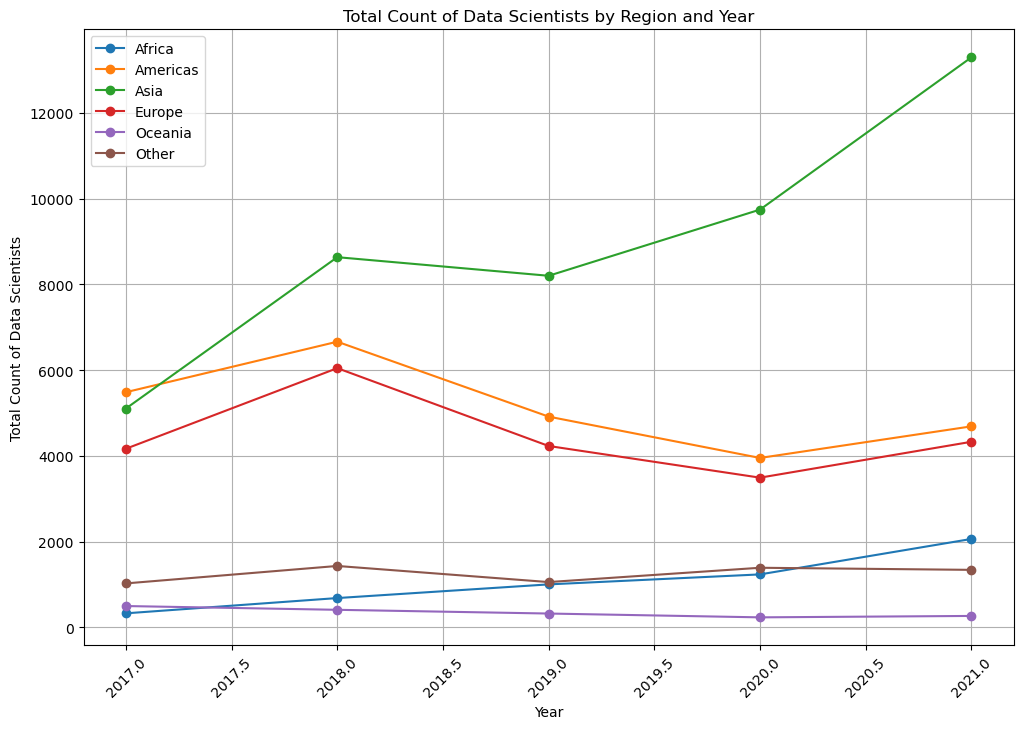

In [90]:
# Group by Region Name and sum the counts for each year
grouped_df = region_over_time.groupby('Region Name').sum()
# Remove the .5 from the years
grouped_df.columns = grouped_df.columns.astype(int)

# Plotting
plt.figure(figsize=(12, 8))
for region in grouped_df.index:
    plt.plot(grouped_df.columns, grouped_df.loc[region], marker='o', label=region)

plt.title('Total Count of Data Scientists by Region and Year')
plt.xlabel('Year')
plt.ylabel('Total Count of Data Scientists')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()

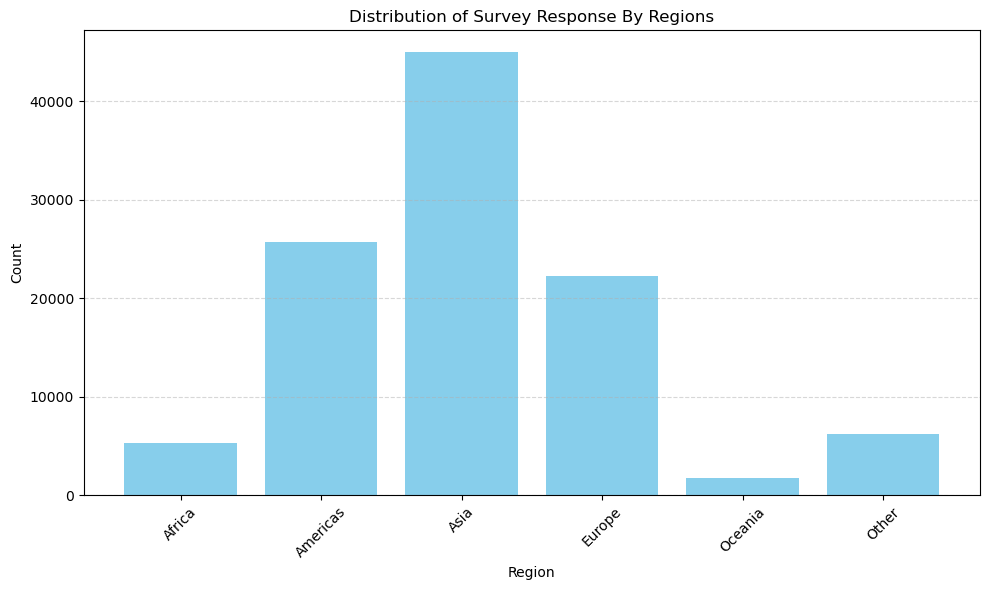

In [89]:
# Group by region and sum the counts
region_counts = country_counts.groupby('Region Name')['Count'].sum().reset_index()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(region_counts['Region Name'], region_counts['Count'], color='skyblue')
plt.title('Distribution of Survey Response By Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Asia, America and Europe has the top 3 highest overall responses.

#### 2. Year (-)

In [40]:
df[question_to_response_and_topic['-']['columns']].value_counts().reset_index()

,"(-, Year)",0
0,2021,25973
1,2018,23859
2,2020,20036
3,2019,19717
4,2017,16716


In [41]:
df[question_to_response_and_topic['-']['columns']].value_counts().reset_index().describe()

,"(-, Year)",0
count,5.000000,5.000000
mean,2019.000000,21260.200000
std,1.581139,3656.984099
min,2017.000000,16716.000000
25%,2018.000000,19717.000000
50%,2019.000000,20036.000000
75%,2020.000000,23859.000000
max,2021.000000,25973.000000


Responses are fron year 2017 to 2021 with an average of 21260 responses per year.

### 3. Demographic

##### 3.1 Age (Q1)

In [42]:
age_counts = filter_column_data_with_question_num(1).value_counts().reset_index()
age_counts.columns = ['Age Group', 'Count']
age_counts

,Age Group,Count
0,25-29,23748
1,22-24,19662
2,30-34,16144
3,18-21,15159
4,35-39,10868
5,40-44,7327
6,45-49,4996
7,50-54,3514
8,55-59,2112
9,60-69,1851


In [43]:
# sort from youngest to oldest
age_mapping = {
    '18-21': 1,
    '22-24': 2,
    '25-29': 3,
    '30-34': 4,
    '35-39': 5,
    '40-44': 6,
    '45-49': 7,
    '50-54': 8,
    '55-59': 9,
    '60-69': 10,
    '70+': 11
}
# Convert age groups to numerical values
age_counts['Age Order'] = age_counts['Age Group'].map(age_mapping)
age_counts

,Age Group,Count,Age Order
0,25-29,23748,3
1,22-24,19662,2
2,30-34,16144,4
3,18-21,15159,1
4,35-39,10868,5
5,40-44,7327,6
6,45-49,4996,7
7,50-54,3514,8
8,55-59,2112,9
9,60-69,1851,10


In [44]:
# Sort the DataFrame based on age order
df_sorted = age_counts.sort_values(by='Age Order')
df_sorted

,Age Group,Count,Age Order
3,18-21,15159,1
1,22-24,19662,2
0,25-29,23748,3
2,30-34,16144,4
4,35-39,10868,5
5,40-44,7327,6
6,45-49,4996,7
7,50-54,3514,8
8,55-59,2112,9
9,60-69,1851,10


In [97]:
df_sorted.to_csv('chart_data/age_group_distribution.csv', index=False)

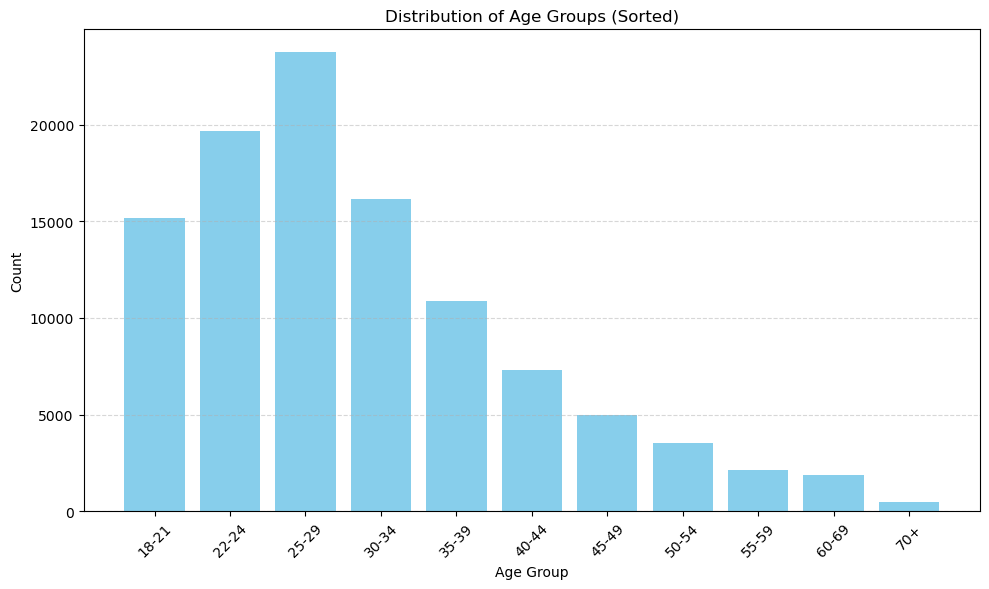

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Age Group'], df_sorted['Count'], color='skyblue')
plt.title('Distribution of Age Groups (Sorted)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- 25-29 age group has the highest frequency.
- Age range starts from 18 to 70+.

##### 3.2 Gender (Q2)

In [113]:
gender_counts = filter_column_data_with_question_num(2, year=True)#.value_counts().reset_index()
gender_counts.columns = ['Gender Group', 'Year']
gender_counts = gender_counts[['Gender Group', 'Year']].value_counts().reset_index()
gender_counts.columns = ['Gender Group', 'Year', 'Count']
gender_counts

,Gender Group,Year,Count
0,Man,2021,20598
1,Male,2018,19430
2,Male,2019,16138
3,Man,2020,15789
4,Male,2017,13610
5,Woman,2021,4890
6,Female,2018,4010
7,Woman,2020,3878
8,Female,2019,3212
9,Female,2017,2778


- Two labels : Male and Man can be under one group, Female and Woman can be under one group.

In [121]:
gender_maps = {'Man':'Male', 'Woman':'Female', 'Nonbinary':'Non-binary, genderqueer, or gender non-conforming'}
for k, v in gender_maps.items():
    gender_counts['Gender Group'] = gender_counts['Gender Group'].replace(v, k)
gender_counts

,Gender Group,Year,Count
0,Man,2021,20598
1,Man,2018,19430
2,Man,2019,16138
3,Man,2020,15789
4,Man,2017,13610
5,Woman,2021,4890
6,Woman,2018,4010
7,Woman,2020,3878
8,Woman,2019,3212
9,Woman,2017,2778


In [122]:

# Group by year and education, then sum the counts
grouped_data = gender_counts.groupby(['Year', 'Gender Group'])['Count'].sum().reset_index()
grouped_data


,Year,Gender Group,Count
0,2017,A different identity,159
1,2017,Man,13610
2,2017,Nonbinary,74
3,2017,Woman,2778
4,2018,Man,19430
5,2018,Prefer not to say,340
6,2018,Prefer to self-describe,79
7,2018,Woman,4010
8,2019,Man,16138
9,2019,Prefer not to say,318


In [126]:
grouped_data.to_csv('chart_data/gender_counts.csv', index=False)

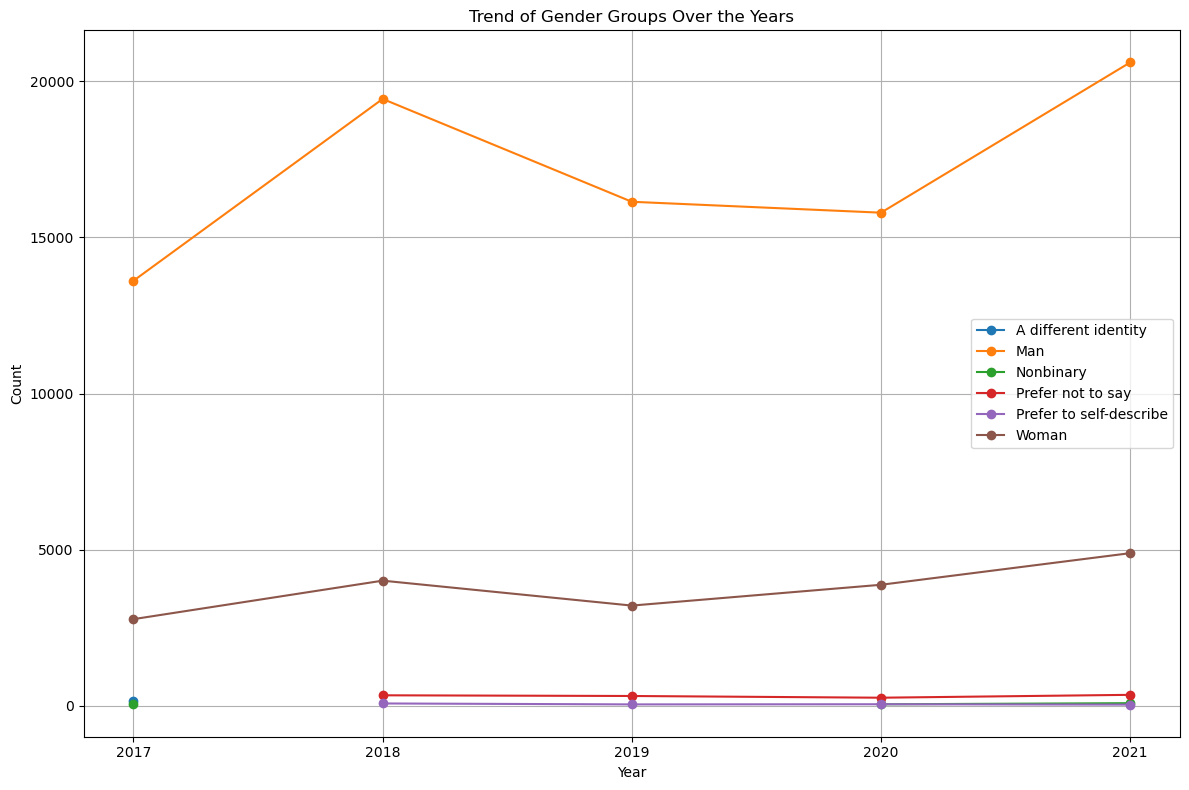

In [124]:
# Pivot the DataFrame to have years as columns and gender groups as index
pivot_df = grouped_data.pivot(index='Gender Group', columns='Year', values='Count')

# Plotting
plt.figure(figsize=(12, 8))
for gender_group in pivot_df.index:
    plt.plot(pivot_df.columns, pivot_df.loc[gender_group], marker='o', label=gender_group)

plt.title('Trend of Gender Groups Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(pivot_df.columns)
plt.tight_layout()
plt.show()

### 4. Education: highest of formal education that you have attained or plan to attain within the next 2 years (Q4)

In [49]:
education_counts = filter_column_data_with_question_num(4, year=True)#.value_counts().reset_index()
education_counts.columns = ['Education', 'Year']
education_counts = education_counts[['Education', 'Year']].value_counts().reset_index()
education_counts.columns = ['Education', 'Year', 'Count']
education_counts

,Education,Year,Count
0,Masterâ€™s degree,2018,10855
1,Masterâ€™s degree,2021,10132
2,Bachelorâ€™s degree,2021,9907
3,Masterâ€™s degree,2019,8549
4,Masterâ€™s degree,2020,7859
5,Bachelorâ€™s degree,2018,7083
6,Bachelorâ€™s degree,2020,6978
7,Master's degree,2017,6273
8,Bachelorâ€™s degree,2019,5993
9,Bachelor's degree,2017,4811


In [50]:
education_counts['Education'].unique()

array(['Masterâ€™s degree', 'Bachelorâ€™s degree', "Master's degree",
       "Bachelor's degree", 'Doctoral degree',
       'Some college/university study without earning a bachelorâ€™s degree',
       "Some college/university study without earning a bachelor's degree",
       'Professional degree', 'I prefer not to answer',
       'No formal education past high school', 'Professional doctorate',
       'I did not complete any formal education past high school'],
      dtype=object)

- There seems to be encoding issue for some:
    - Masters degree and showing `Master's degree` and `Masterâ€™s degree` as two separate rows.
    - Masters degree and showing `Bachelor's degree` and `Bachelorâ€™s degree` as two separate rows.
    - `No formal education past high school` and `I did not complete any formal education past high school` are also the same.
    - `Some college/university study without earning a bachelorâ€™s degree` and `Some college/university study without earning a bachelor's degree`
- We can combine them to have a more accurate analysis.

In [51]:
def group_and_sum(keep_label, remove_label, education_counts):
    grouped_sum = education_counts[education_counts['Education'].isin([keep_label, remove_label])]['Count'].sum()
    education_counts.loc[education_counts['Education'] == keep_label, 'Count'] = grouped_sum
    education_counts = education_counts[education_counts['Education'] != remove_label]
    return education_counts


In [52]:
education_counts = group_and_sum("Master's degree", "Masterâ€™s degree", education_counts)
education_counts = group_and_sum("Bachelor's degree", "Bachelorâ€™s degree", education_counts)
education_counts = group_and_sum("No formal education past high school", "I did not complete any formal education past high school", education_counts)
education_counts = group_and_sum("Some college/university study without earning a bachelor's degree", "Some college/university study without earning a bachelorâ€™s degree", education_counts)
# Calculate the total count of all rows in the 'Count' column
# total_count = education_counts['Count'].sum()
# Compute the percentage for each row
# education_counts['Percentage'] = round((education_counts['Count'] / total_count) * 100, 2)
# education_counts = education_counts.reset_index(drop=True)
education_counts

,Education,Year,Count
7,Master's degree,2017,43668
9,Bachelor's degree,2017,34772
10,Doctoral degree,2018,3357
11,Doctoral degree,2021,2795
12,Doctoral degree,2019,2767
13,Doctoral degree,2017,2347
14,Doctoral degree,2020,2302
19,Some college/university study without earning a bachelor's degree,2017,5417
20,Professional degree,2020,699
21,I prefer not to answer,2021,627


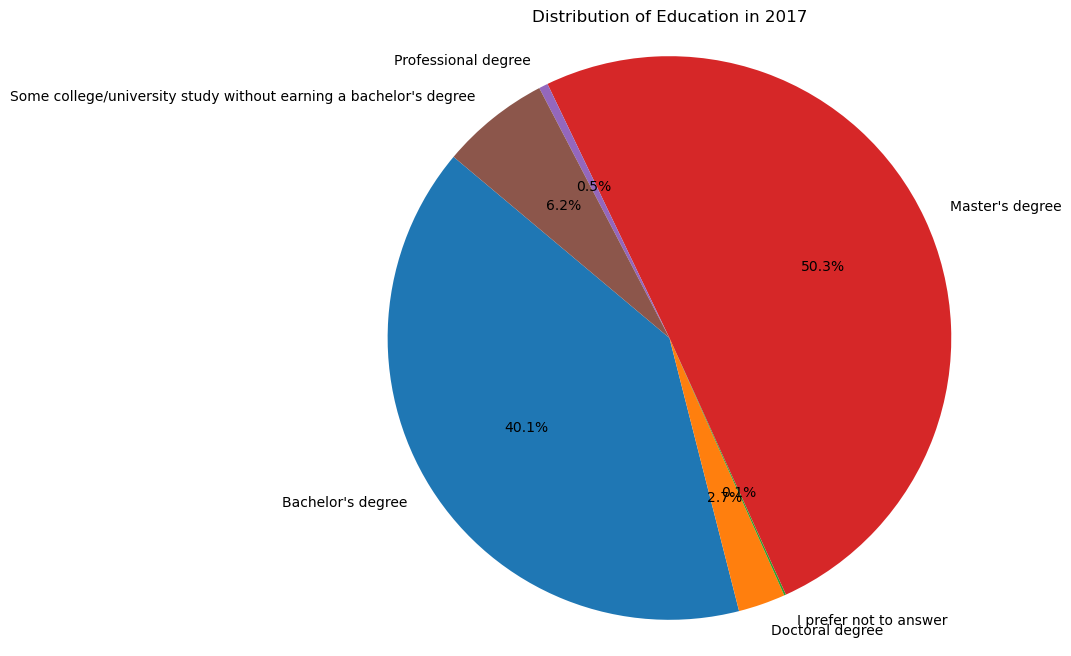

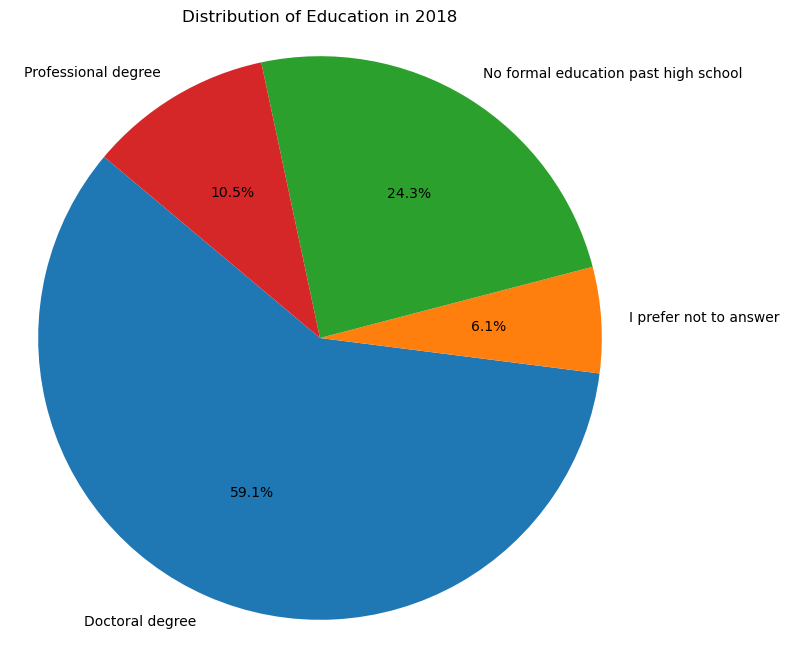

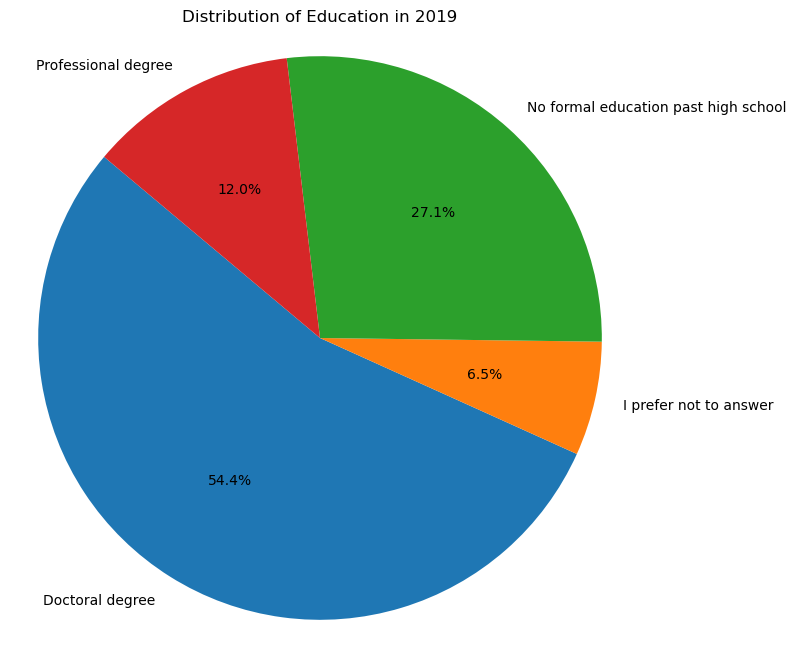

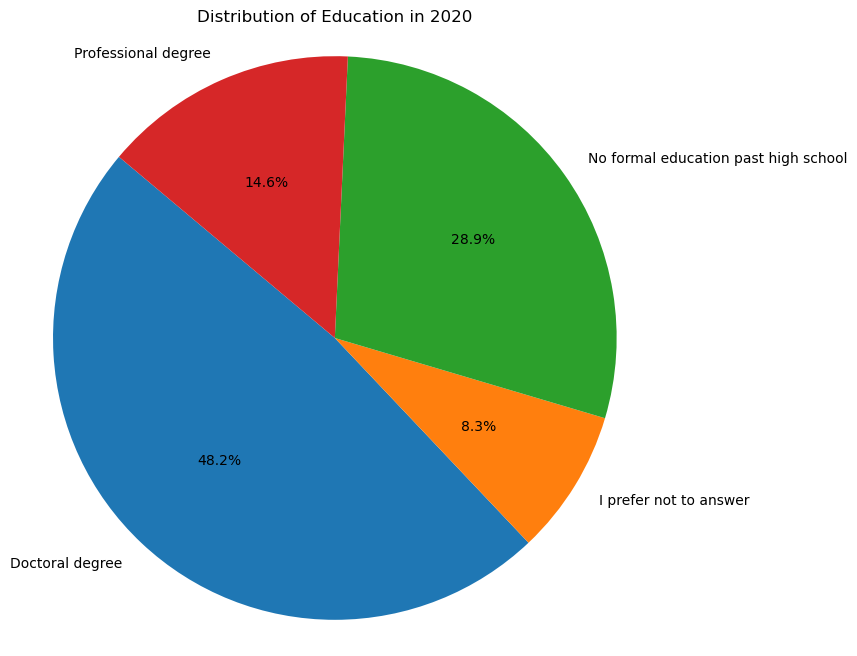

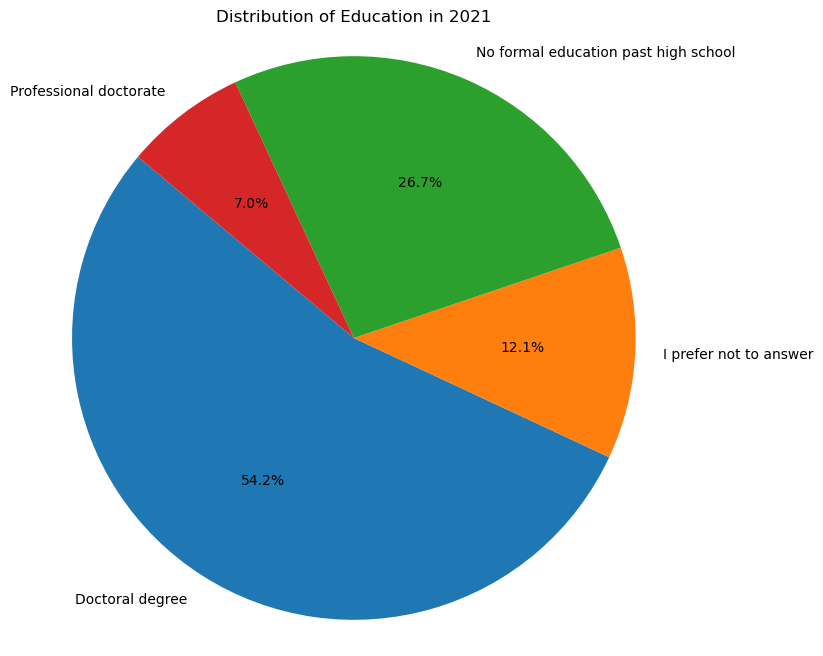

In [127]:

# Group by year and education, then sum the counts
grouped_data = education_counts.groupby(['Year', 'Education'])['Count'].sum().reset_index()

# Create a pie chart for each year
years = grouped_data['Year'].unique()
years = sorted(years)

for year in years:
    data_year = grouped_data[grouped_data['Year'] == year]
    plt.figure(figsize=(8, 8))
    plt.pie(data_year['Count'], labels=data_year['Education'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Education in {year}')
    plt.axis('equal')
    plt.show()

In [128]:
grouped_data.to_csv('chart_data/education_background.csv',index=False)

### 5. Industry (Q20)

In [130]:
industry = filter_column_data_with_question_num(20, year=True)#.groupby().reset_index()
industry.columns = ['Industry', 'Year']
industry = pd.DataFrame(industry[['Industry', 'Year']].value_counts()).reset_index()
industry.columns = ['Industry', 'Year', 'Count']
industry = industry.sort_values(by=['Year', 'Count'], ascending=False)
industry

,Industry,Year,Count
2,Computers/Technology,2021,4079
3,Academics/Education,2021,3214
5,Accounting/Finance,2021,1459
7,Other,2021,1136
9,Manufacturing/Fabrication,2021,872
11,Medical/Pharmaceutical,2021,776
13,Government/Public Service,2021,726
15,Online Service/Internet-based Services,2021,585
18,Energy/Mining,2021,558
19,Retail/Sales,2021,536


In [173]:
filter_column_data_with_question_num(20, year=True).value_counts()

(Q20, In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice)  (-, Year)
Computers/Technology                                                                                                    2018         5584
I am a student                                                                                                          2018         4658
Computers/Technology                                                                                                    2021         4079
Academics/Education                                                                                                     2021         3214
                                                                                                                        2018         2749
Accounting/Finance                                                                                                      2021         1459
                                          

<Figure size 1600x1000 with 0 Axes>

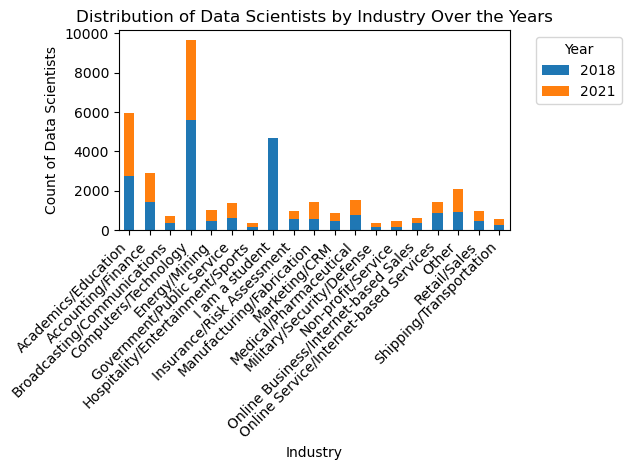

In [131]:
# Group by industry and year, then sum the counts
grouped_data = industry.groupby(['Industry', 'Year'])['Count'].sum().unstack()

# Plotting
plt.figure(figsize=(16, 10))  # Adjust the figsize here
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Industry')
plt.ylabel('Count of Data Scientists')
plt.title('Distribution of Data Scientists by Industry Over the Years')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [134]:
industry.to_csv('chart_data/industries.csv', index=False)

### 6. Change in data scientist salaries over time(Q25)

In [200]:
salary_usd = filter_column_data_with_question_num(25, year=True)#.groupby().reset_index()
salary_usd = salary_usd.dropna()
salary_usd.columns = ['Salary', 'Year']
# Function to extract salary range
def extract_salary_range(salary_range):
    try:
        if '>' in salary_range or '+' in salary_range:
            highest_value = int(''.join(filter(str.isdigit, salary_range)))
            return 0, highest_value
        else:
            salary_range = salary_range.replace('$','')
            lowest_value = int(salary_range.split('-')[0].replace(',',''))
            highest_value = int(salary_range.split('-')[1].replace(',',''))
            return lowest_value, highest_value
    except Exception:
        return 'Undisclosed', 'Undisclosed'
# Apply the function to create two new columns
salary_usd['LowestSalary'], salary_usd['HighestSalary'] = zip(*salary_usd['Salary'].apply(lambda x: extract_salary_range(x)))
salary_usd = salary_usd[salary_usd['LowestSalary'] != 'Undisclosed']
salary_usd['AverageSalary'] = salary_usd.apply(lambda x: x['LowestSalary']+x['HighestSalary']/2,axis=1)
salary_usd

,Salary,Year,LowestSalary,HighestSalary,AverageSalary
0,"25,000-29,999",2021,25000,29999,39999.5
1,"60,000-69,999",2021,60000,69999,94999.5
2,$0-999,2021,0,999,499.5
3,"30,000-39,999",2021,30000,39999,49999.5
4,"30,000-39,999",2021,30000,39999,49999.5
...,...,...,...,...,...
89569,"90-100,000",2018,90,100000,50090.0
89570,"0-10,000",2018,0,10000,5000.0
89579,"10-20,000",2018,10,20000,10010.0
89580,"250-300,000",2018,250,300000,150250.0


In [204]:
salary_usd[salary_usd['Year'] == 2018]['AverageSalary'].mean()

28756.42394192754

In [202]:
salary_usd.to_csv('chart_data/salary_usd_over_Time.csv', index=False)

In [205]:
data = []
for year in salary_usd['Year'].unique():
    avg_salary = salary_usd[salary_usd['Year'] == year]['AverageSalary'].mean()
    data.append((year, avg_salary))

In [206]:
data

[(2021, 59860.47583003054),
 (2020, 61991.0232081275),
 (2019, 72333.70648955749),
 (2018, 28756.42394192754)]

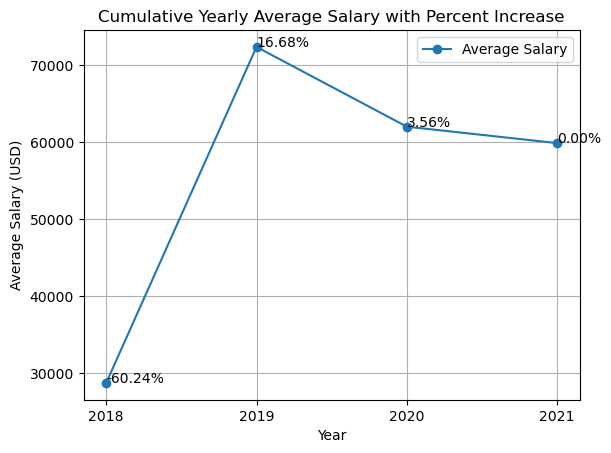

In [207]:
# Extract years and average salaries from the provided data
years = [entry[0] for entry in data]
avg_salaries = [entry[1] for entry in data]

# Calculate percent increase
percent_increase = [0]  # Assuming no increase for the first year
for i in range(1, len(avg_salaries)):
    increase = ((avg_salaries[i] - avg_salaries[i - 1]) / avg_salaries[i - 1]) * 100
    percent_increase.append(increase)

# Plotting
plt.plot(years, avg_salaries, marker='o', label='Average Salary')
plt.title('Cumulative Yearly Average Salary with Percent Increase')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.xticks(years)

# Annotate with percent increase
for i, txt in enumerate(percent_increase):
    plt.annotate(f'{txt:.2f}%', (years[i], avg_salaries[i]))

plt.legend()
plt.show()

## Topic 2: Data Infrastructure and Tools

In [60]:
questionnaire[questionnaire['question_group'] == 'Data Infrastructure and Tools']

,Q,max_response_count,multiple_options_selectable,question,columns,choices,question_group
0,32,30,1,"Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?","[Q32_A_Part_1, Q32_A_Part_2, Q32_A_Part_3, Q32_A_Part_4, Q32_A_Part_5, Q32_A_Part_6, Q32_A_Part_7, Q32_A_Part_8, Q32_A_Part_11, Q32_A_Part_14, Q32_A_Part_15, Q32_A_Part_16, Q32_A_Part_17, Q32_A_Part_20, Q32_A_OTHER, Q32_B_Part_1, Q32_B_Part_2, Q32_B_Part_3, Q32_B_Part_4, Q32_B_Part_5, Q32_B_Part_6, Q32_B_Part_7, Q32_B_Part_8, Q32_B_Part_11, Q32_B_Part_13, Q32_B_Part_15, Q32_B_Part_16, Q32_B_Part_17, Q32_B_Part_20, Q32_B_OTHER]","[MySQL, PostgreSQL, SQLite, Oracle Database, MongoDB, Snowflake, IBM Db2, Microsoft SQL Server, Amazon Redshift, Amazon DynamoDB, Google Cloud BigQuery, Google Cloud SQL, Google Cloud Firestore, None, Other, MySQL, PostgreSQL, SQLite, Oracle Database, MongoDB, Snowflake, IBM Db2, Microsoft SQL Server, Amazon Redshift, Amazon DynamoDB, Google Cloud BigQuery, Google Cloud SQL, Google Cloud Firestore, None, Other]",Data Infrastructure and Tools
1,34,28,1,Which of the following business intelligence tools do you use on a regular basis?,"[Q34_A_Part_1, Q34_A_Part_2, Q34_A_Part_3, Q34_A_Part_4, Q34_A_Part_5, Q34_A_Part_6, Q34_A_Part_8, Q34_A_Part_9, Q34_A_Part_10, Q34_A_Part_11, Q34_A_Part_12, Q34_A_Part_13, Q34_A_Part_16, Q34_A_OTHER, Q34_B_Part_1, Q34_B_Part_2, Q34_B_Part_3, Q34_B_Part_4, Q34_B_Part_5, Q34_B_Part_6, Q34_B_Part_8, Q34_B_Part_9, Q34_B_Part_10, Q34_B_Part_11, Q34_B_Part_12, Q34_B_Part_13, Q34_B_Part_16, Q34_B_OTHER]","[Amazon QuickSight, Microsoft Power BI, Google Data Studio, Looker, Tableau, Salesforce, Qlik, Domo, TIBCO Spotfire, Alteryx, Sisense, SAP Analytics Cloud, None, Other, Microsoft Power BI, Amazon QuickSight, Google Data Studio, Looker, Tableau, Salesforce, Qlik, Domo, TIBCO Spotfire, Alteryx, Sisense, SAP Analytics Cloud, None, Other]",Data Infrastructure and Tools
2,27,24,1,Which of the following cloud computing platforms do you use on a regular basis?,"[Q27_A_Part_1, Q27_A_Part_2, Q27_A_Part_3, Q27_A_Part_4, Q27_A_Part_5, Q27_A_Part_6, Q27_A_Part_7, Q27_A_Part_8, Q27_A_Part_9, Q27_A_Part_10, Q27_A_Part_11, Q27_A_OTHER, Q27_B_Part_1, Q27_B_Part_2, Q27_B_Part_3, Q27_B_Part_4, Q27_B_Part_5, Q27_B_Part_6, Q27_B_Part_7, Q27_B_Part_8, Q27_B_Part_9, Q27_B_Part_10, Q27_B_Part_11, Q27_B_OTHER]","[Amazon Web Services (AWS), Microsoft Azure, Google Cloud Platform (GCP), IBM Cloud / Red Hat, Oracle Cloud, SAP Cloud, Salesforce Cloud, VMware Cloud, Alibaba Cloud, Tencent Cloud, None, Other]",Data Infrastructure and Tools
6,10,14,1,Which of the following hosted notebook products do you use on a regular basis?,"[Q10_Part_1, Q10_Part_2, Q10_Part_3, Q10_Part_4, Q10_Part_5, Q10_Part_6, Q10_Part_7, Q10_Part_8, Q10_Part_9, Q10_Part_10, Q10_Part_11, Q10_Part_12, Q10_Part_16, Q10_OTHER]","[Kaggle Notebooks, Colab Notebooks, Azure Notebooks, Paperspace / Gradient, Binder / JupyterHub, Code Ocean, IBM Watson Studio, Amazon Sagemaker Studio Notebooks, Amazon EMR Notebooks, Google Cloud Notebooks (AI Platform / Vertex AI), Google Cloud Datalab, Databricks Collaborative Notebooks, None, Other]",Data Infrastructure and Tools
7,7,13,1,What programming languages do you use on a regular basis?,"[Q7_Part_1, Q7_Part_2, Q7_Part_3, Q7_Part_4, Q7_Part_5, Q7_Part_6, Q7_Part_7, Q7_Part_8, Q7_Part_9, Q7_Part_10, Q7_Part_11, Q7_Part_12, Q7_OTHER]","[Python, R, SQL, C, C++, Java, Javascript, Julia, Swift, Bash, MATLAB, None, Other]",Data Infrastructure and Tools
8,14,12,1,What data visualization libraries or tools do you use on a regular basis?,"[Q14_Part_1, Q14_Part_2, Q14_Part_3, Q14_Part_4, Q14_Part_5, Q14_Part_6, Q14_Part_7, Q14_Part_8, Q14_Part_9, Q14_Part_10, Q14_Part_11, Q14_OTHER]","[Matplotlib, Seaborn, Plotly / Plotly Express, Ggplot / ggplot2, Shiny, D3 js, Altair, Bokeh, Geoplotlib, Leaflet / Folium, None, Other]",Data Infrastructure and Tools
20,8,1,0,What programming l

In [61]:
def filter_parts(part_name, data_df):
    desired_part_nums = [i[0] for i in data_df.columns if part_name in i[0]]
    return data_df[[i for i in data_df.columns if i[0] in desired_part_nums]]

def split_multiple_part_q_data_df(data_df, parts=['A', 'B'], year=False):
    # one-hot encode
    binary_df = data_df.notnull().astype(int)
    return [filter_parts(each, binary_df) for each in parts]

def get_choices(data_df):
    return [i[1].split('Selected Choice -')[1].strip() for i in data_df.columns]

def sum_binary_data_df_and_visualise_horizontal_bargraph(binary_data_df, x_label, y_label, chart_title, color='skyblue'):
    sum_rowise = binary_data_df.T.sum(axis=1)
    labels = get_choices(binary_data_df)
    sorted_data = sorted(zip(sum_rowise, labels), reverse=False)

    # Unzip the sorted data
    sorted_sum_rowise, sorted_labels = zip(*sorted_data)

    # Create a horizontal bar plot with sorted row-wise sums
    plt.figure(figsize=(10, 8))
    plt.barh(sorted_labels, sorted_sum_rowise, color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(chart_title)
    plt.tight_layout()
    plt.show()



#### 2.1: Most popular Big Data Tools (Q32)

In [277]:
bigdata_tools = filter_column_data_with_question_num(32, year=True)
bigdata_tools

,Q32_A_Part_1,Q32_A_Part_2,Q32_A_Part_3,Q32_A_Part_4,Q32_A_Part_5,Q32_A_Part_6,Q32_A_Part_7,Q32_A_Part_8,Q32_A_Part_11,Q32_A_Part_14,...,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_11,Q32_B_Part_13,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_20,Q32_B_OTHER,-
,"Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - MySQL","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - PostgreSQL","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - SQLite","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Oracle Database","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - MongoDB","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Snowflake","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - IBM Db2","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft SQL Server","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon Redshift","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon DynamoDB",...,"Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - IBM Db2","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Microsoft SQL Server","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Amazon Redshift","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Amazon DynamoDB","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Google Cloud BigQuery","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Google Cloud SQL","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Google Cloud Firestore","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all t

In [278]:
parts_of_questions = split_multiple_part_q_data_df(bigdata_tools)
len(parts_of_questions)

2

In [279]:
parts_of_questions[0]

,Q32_A_Part_1,Q32_A_Part_2,Q32_A_Part_3,Q32_A_Part_4,Q32_A_Part_5,Q32_A_Part_6,Q32_A_Part_7,Q32_A_Part_8,Q32_A_Part_11,Q32_A_Part_14,Q32_A_Part_15,Q32_A_Part_16,Q32_A_Part_17,Q32_A_Part_20,Q32_A_OTHER
,"Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - MySQL","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - PostgreSQL","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - SQLite","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Oracle Database","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - MongoDB","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Snowflake","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - IBM Db2","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft SQL Server","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon Redshift","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon DynamoDB","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud BigQuery","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud SQL","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud Firestore","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - None","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Other"
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
106297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
106298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


There are 2 parts to the questions:
1. Part A: Frequently Used
2. Part B: Hope to be familiar

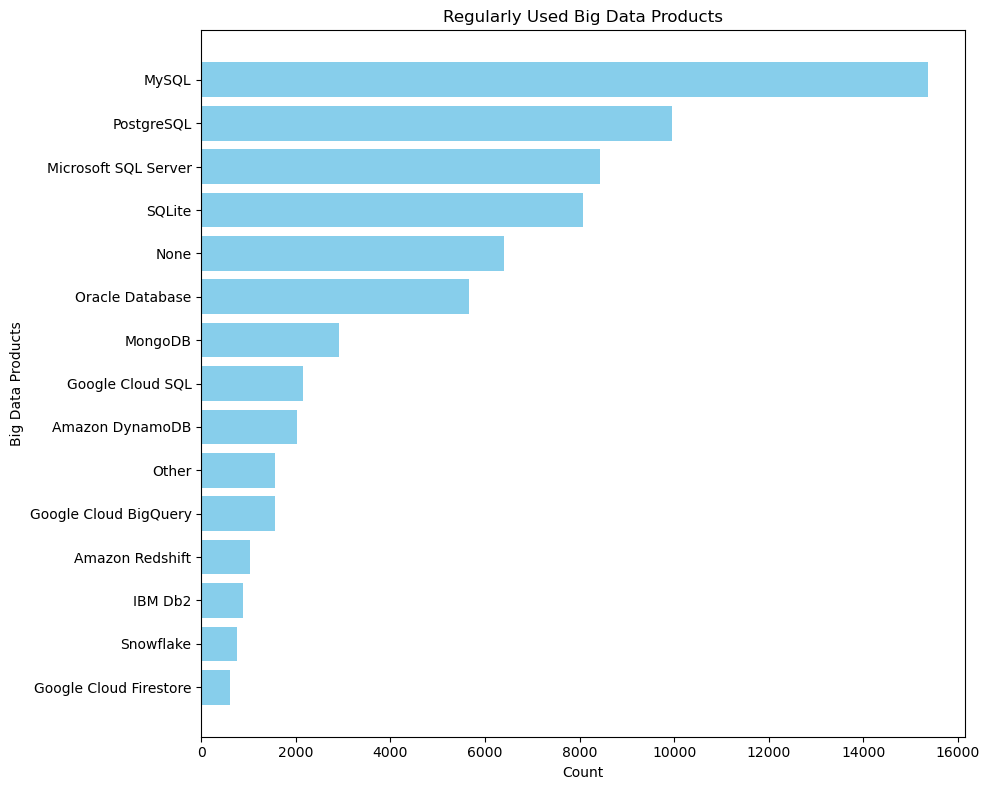

In [280]:
sum_binary_data_df_and_visualise_horizontal_bargraph(parts_of_questions[0], 'Count', 'Big Data Products', 'Regularly Used Big Data Products')

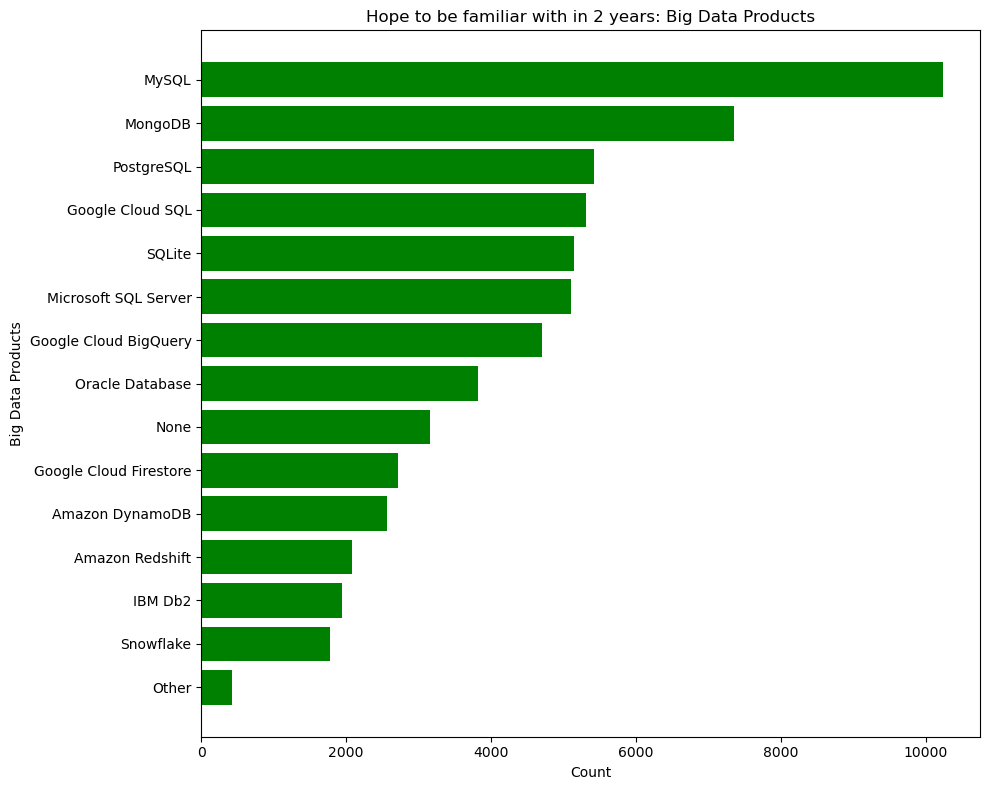

In [281]:
sum_binary_data_df_and_visualise_horizontal_bargraph(parts_of_questions[1], 'Count', 'Big Data Products', 'Hope to be familiar with in 2 years: Big Data Products', 'green')

#### 2.2: Most popular Business Intelligence Tools (Q34)

In [67]:
bi_tools = filter_column_data_with_question_num(34)
bi_tools

,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,...,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_16,Q34_B_OTHER
,Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon QuickSight,Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft Power BI,Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Google Data Studio,Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Looker,Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Tableau,Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Salesforce,Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Qlik,Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Domo,Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - TIBCO Spotfire,Which of the following business intelligence tools do you use on a regular basis? (Select all that apply) - Selected Choice - Alteryx,...,Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Tableau,Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Salesforce,Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Qlik,Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Domo,Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - TIBCO Spotfire,Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Alteryx,Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Sisense,Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - SAP Analytics Cloud,Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - None,Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tableau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,NaN,Microsoft Power BI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN

In [68]:
# since this also has two parts to the question, we can use the same functions as above
bi_tools_questions_parts = split_multiple_part_q_data_df(bi_tools)
len(bi_tools_questions_parts)

2

There are 2 parts to the questions:
1. Part A: Frequently Used
2. Part B: Hope to be familiar

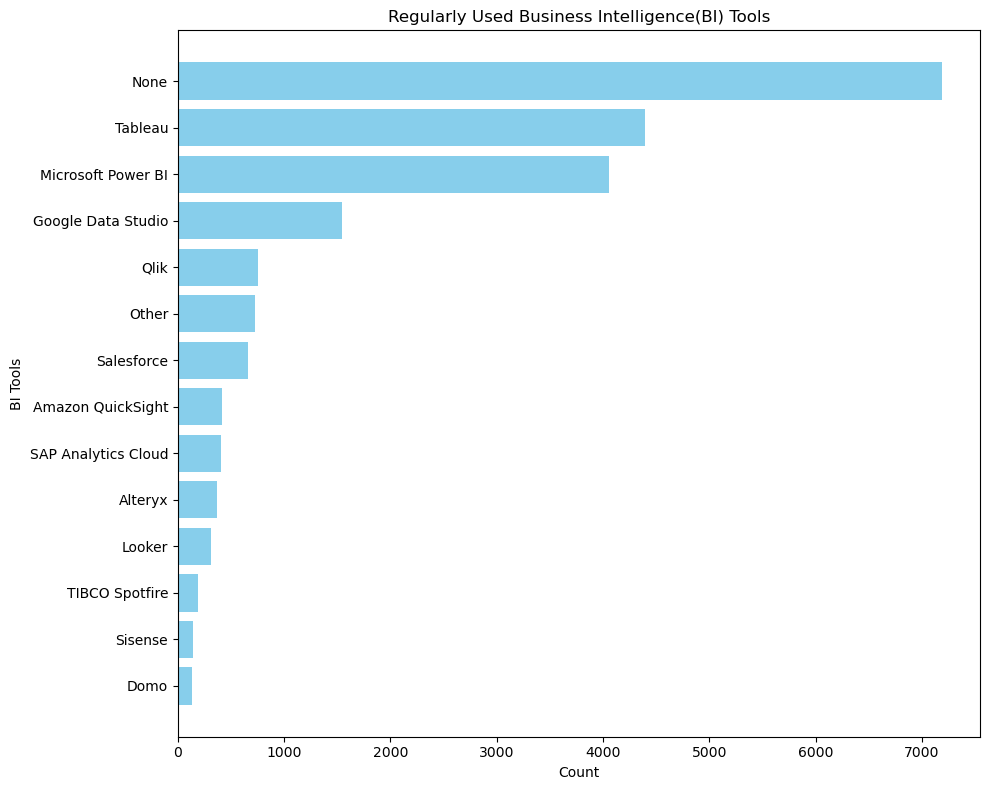

In [69]:
sum_binary_data_df_and_visualise_horizontal_bargraph(bi_tools_questions_parts[0], 'Count', 'BI Tools', 'Regularly Used Business Intelligence(BI) Tools')

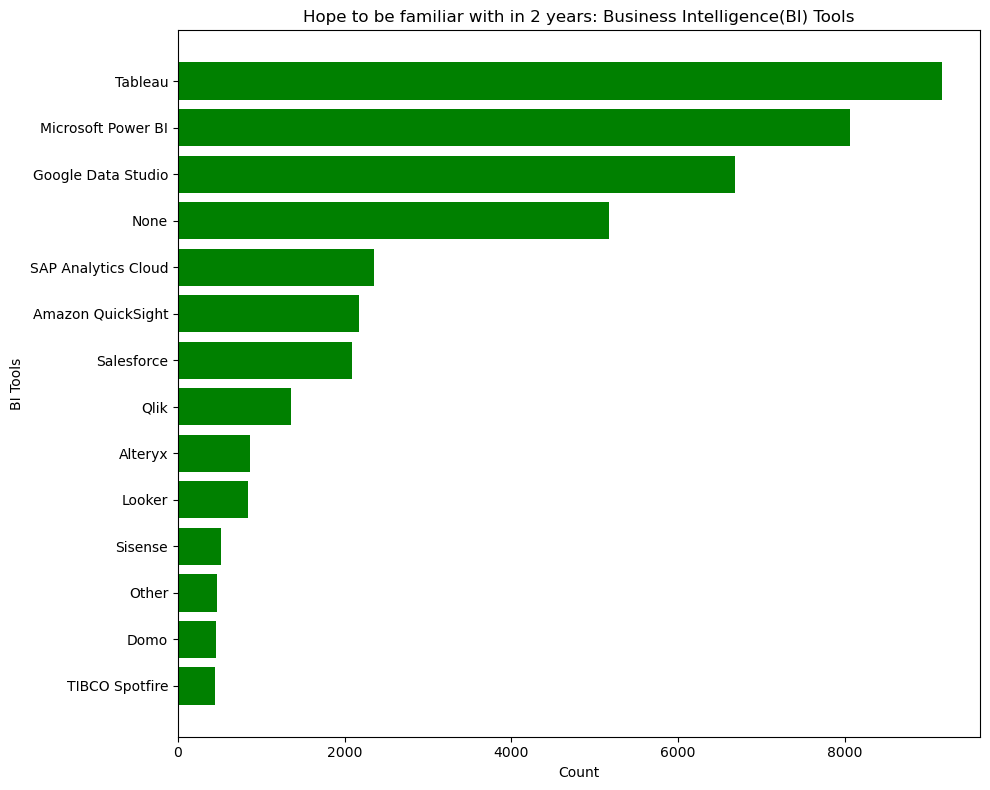

In [70]:
sum_binary_data_df_and_visualise_horizontal_bargraph(bi_tools_questions_parts[1], 'Count', 'BI Tools', 'Hope to be familiar with in 2 years: Business Intelligence(BI) Tools', 'green')

#### 2.3: Cloud computing platforms (Q27)

In [71]:
cloud_computing_platforms = filter_column_data_with_question_num(27)
cloud_computing_platforms

,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,...,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER
,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon Web Services (AWS),Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft Azure,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud Platform (GCP),Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - IBM Cloud / Red Hat,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Oracle Cloud,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - SAP Cloud,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Salesforce Cloud,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - VMware Cloud,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Alibaba Cloud,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Tencent Cloud,...,Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice - Google Cloud Platform (GCP),Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice - IBM Cloud / Red Hat,Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice - Oracle Cloud,Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice - SAP Cloud,Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice - VMware Cloud,Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice - Salesforce Cloud,Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice - Alibaba Cloud,Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice - Tencent Cloud,Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice - None,Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years? - Selected Choice - Other
0,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Google Cloud Platform (GCP),NaN,Oracle Cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Microsoft Azure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN

In [282]:
cloud_computing_platforms_parts = split_multiple_part_q_data_df(cloud_computing_platforms)

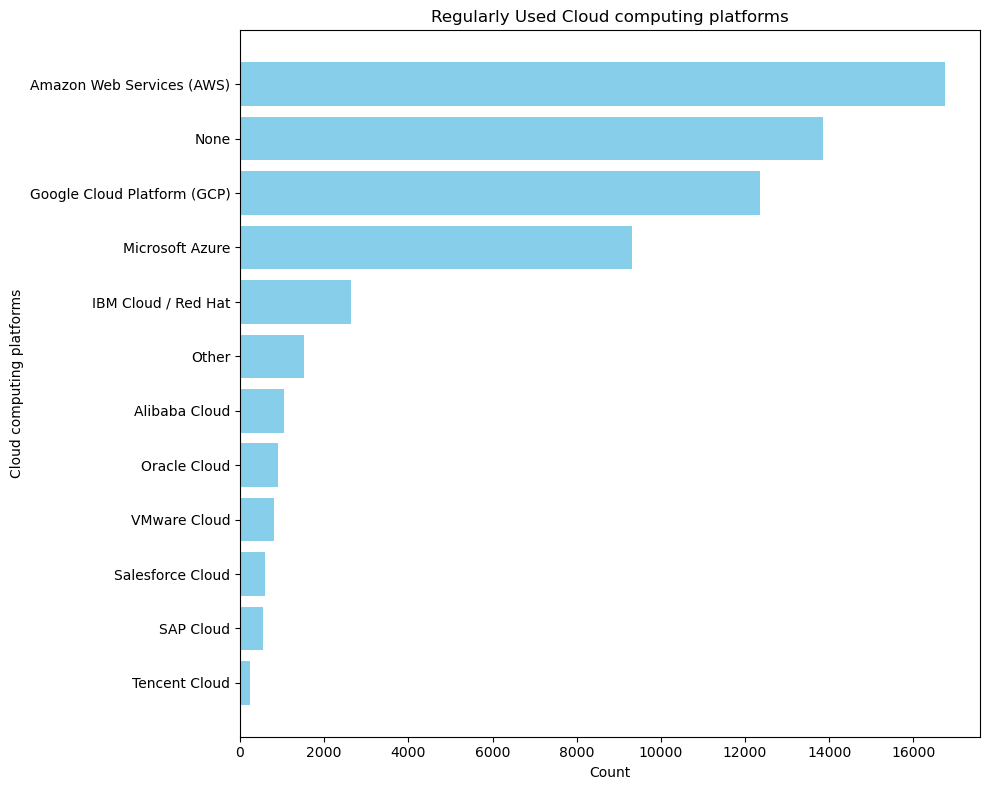

In [73]:
sum_binary_data_df_and_visualise_horizontal_bargraph(cloud_computing_platforms_parts[0], 'Count', 'Cloud computing platforms', 'Regularly Used Cloud computing platforms')

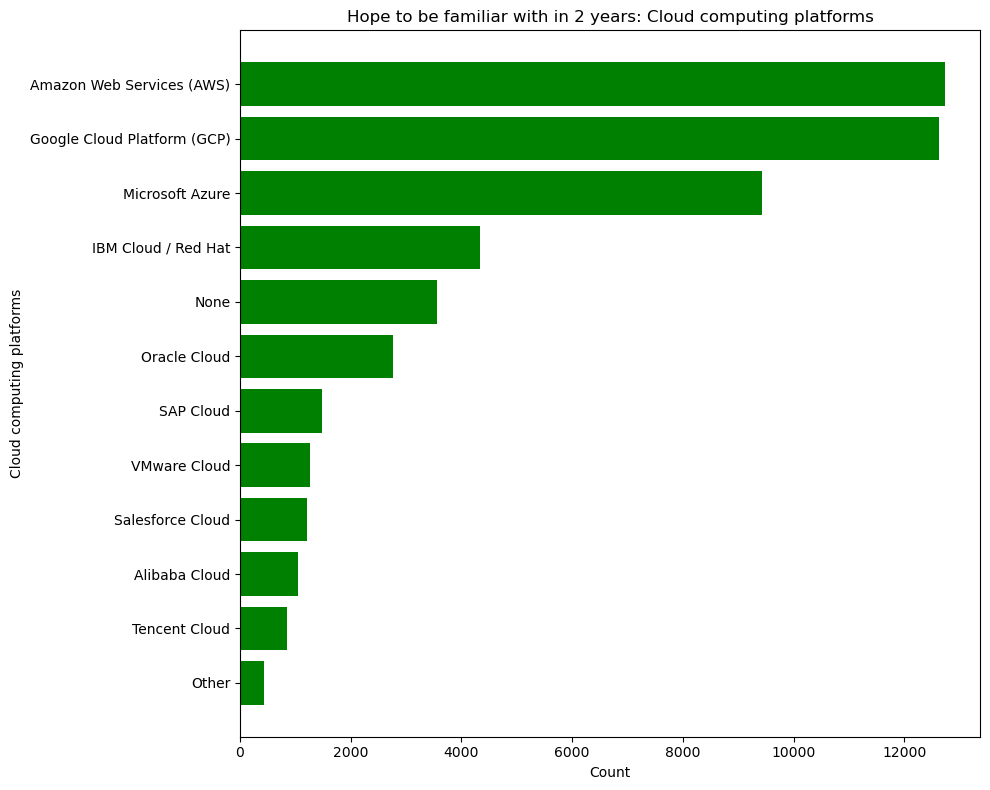

In [74]:
sum_binary_data_df_and_visualise_horizontal_bargraph(cloud_computing_platforms_parts[1], 'Count', 'Cloud computing platforms', 'Hope to be familiar with in 2 years: Cloud computing platforms', 'green')

#### 2.4 Hosted notebook products(Q10)

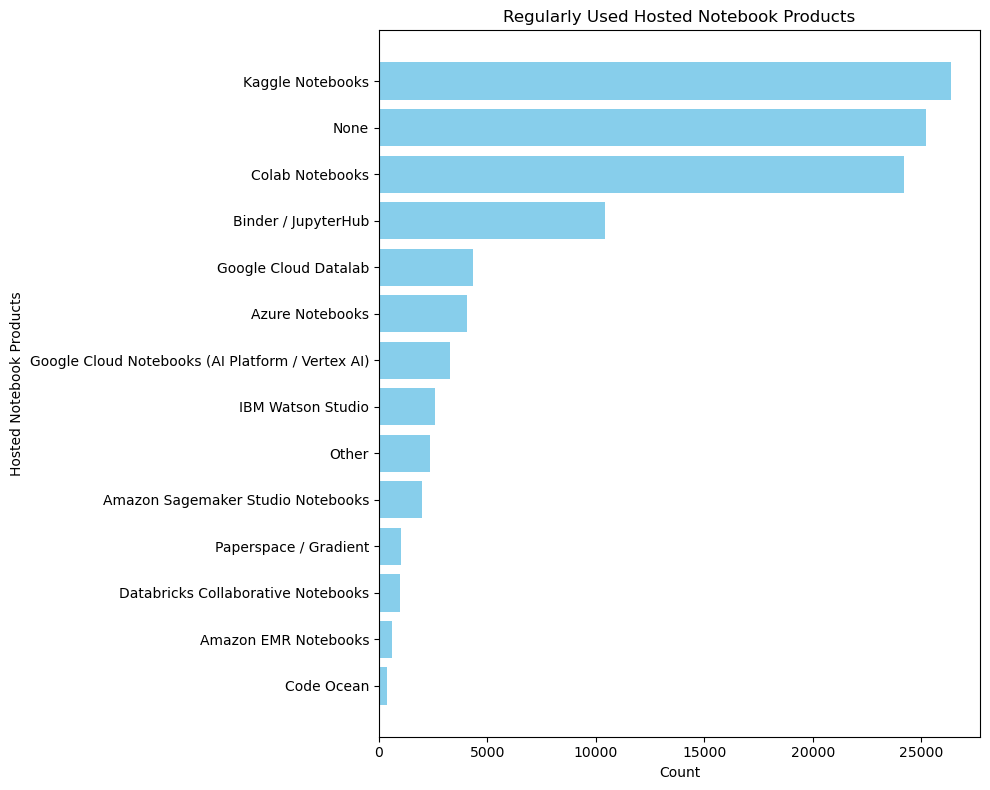

In [75]:
hosted_notebooks = filter_column_data_with_question_num(10)
hosted_notebooks = hosted_notebooks.notnull().astype(int)
sum_binary_data_df_and_visualise_horizontal_bargraph(hosted_notebooks, 'Count', 'Hosted Notebook Products', 'Regularly Used Hosted Notebook Products')

#### 2.5 Programming languages do you use (Q7)

In [263]:
pl = filter_column_data_with_question_num(7, year=True)
labels = get_choices(filter_column_data_with_question_num(7))
pl.columns = labels + ['Year']
# pl = pd.DataFrame(filter_column_data_with_question_num(7, year=True).value_counts()).reset_index()
# ml_use.columns = ['Response', 'Year', 'Count']
for col in labels:
    pl[col] = pl[col].notnull().astype(int)
# pl[:, :-1] = pl[:, :-1].notnull().astype(int)
pl
# sum_binary_data_df_and_visualise_horizontal_bargraph(pl, 'Count', 'Programming languages', 'Regularly Used Programming languages')

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/1184046764.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other,Year
0,1,1,0,0,0,0,0,0,0,0,0,0,0,2021
1,0,0,1,1,1,1,0,0,0,0,0,0,0,2021
2,1,0,0,0,1,1,0,0,0,0,0,0,0,2021
3,1,0,0,0,0,0,0,0,0,0,0,0,0,2021
4,1,0,0,1,0,0,0,0,0,0,1,0,0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106296,0,0,0,0,0,0,0,0,0,0,0,0,0,2017
106297,0,0,0,0,0,0,0,0,0,0,0,0,0,2017
106298,0,0,0,0,0,0,0,0,0,0,0,0,0,2017
106299,0,0,0,0,0,0,0,0,0,0,0,0,0,2017


<Figure size 1000x600 with 0 Axes>

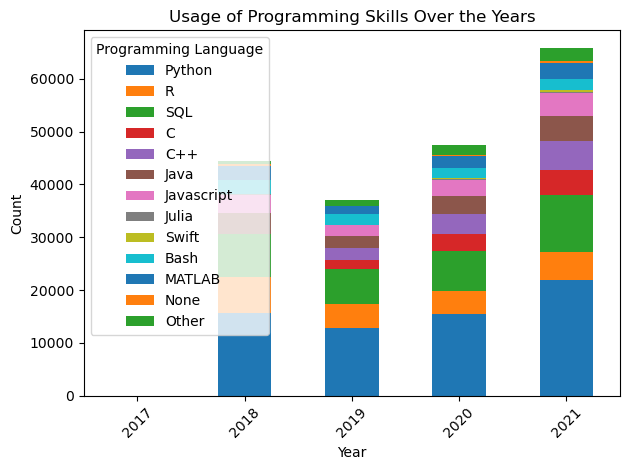

In [265]:
# Group by year and sum the counts of each programming language
grouped = pl.groupby('Year').sum()

# Plotting
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', stacked=True)
plt.title('Usage of Programming Skills Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Programming Language')
plt.tight_layout()
plt.show()

In [267]:
grouped.to_csv('chart_data/grouped_programming_langugaes.csv')

#### 2.6 Visualisation Tools (Q14)

In [ ]:
vt = filter_column_data_with_question_num(14, year=True)
labels = get_choices(filter_column_data_with_question_num(14))
vt.columns = labels + ['Year']
for col in labels:
    vt[col] = vt[col].notnull().astype(int)
vt

<Figure size 1000x600 with 0 Axes>

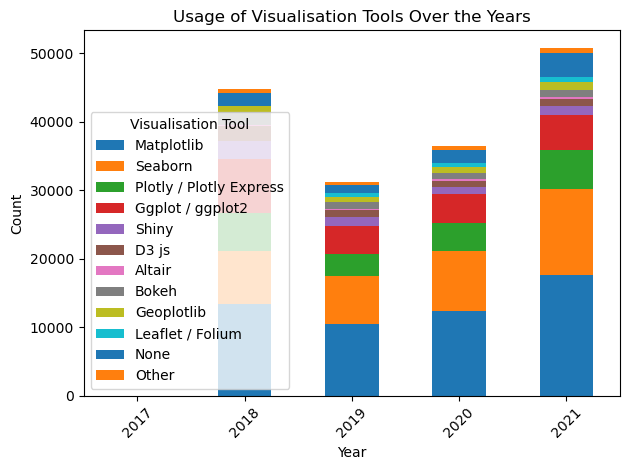

In [275]:
# Group by year and sum the counts of each programming language
grouped = vt.groupby('Year').sum()

# Plotting
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', stacked=True)
plt.title('Usage of Visualisation Tools Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Visualisation Tool')
plt.tight_layout()
plt.show()

In [276]:
grouped.to_csv('chart_data/visualisation_tools.csv')

## Topic 3: Machine Learning and AI Tools

In [77]:
questionnaire[questionnaire['question_group'] == 'Machine Learning and AI Tools']

,Q,max_response_count,multiple_options_selectable,question,columns,choices,question_group
3,38,20,1,Do you use any tools to help manage machine learning experiments?,"[Q38_A_Part_1, Q38_A_Part_2, Q38_A_Part_3, Q38_A_Part_4, Q38_A_Part_5, Q38_A_Part_6, Q38_A_Part_7, Q38_A_Part_9, Q38_A_Part_11, Q38_A_OTHER, Q38_B_Part_1, Q38_B_Part_2, Q38_B_Part_3, Q38_B_Part_4, Q38_B_Part_5, Q38_B_Part_6, Q38_B_Part_7, Q38_B_Part_9, Q38_B_Part_11, Q38_B_OTHER]","[Neptune.ai, Weights & Biases, Comet.ml, Sacred + Omniboard, TensorBoard, Guild.ai, Polyaxon, Domino Model Monitor, No / None, Other, Neptune.ai, Weights & Biases, Comet.ml, Sacred + Omniboard, TensorBoard, Guild.ai, Polyaxon, Domino Model Monitor, None, Other]",Machine Learning and AI Tools
4,36,16,1,Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?,"[Q36_A_Part_1, Q36_A_Part_2, Q36_A_Part_3, Q36_A_Part_4, Q36_A_Part_5, Q36_A_Part_6, Q36_A_Part_7, Q36_A_OTHER, Q36_B_Part_1, Q36_B_Part_2, Q36_B_Part_3, Q36_B_Part_4, Q36_B_Part_5, Q36_B_Part_6, Q36_B_Part_7, Q36_B_OTHER]","[Automated data augmentation (e.g. imgaug, albumentations), Automated feature engineering/selection (e.g. tpot, boruta_py), Automated model selection (e.g. auto-sklearn, xcessiv), Automated model architecture searches (e.g. darts, enas), Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier), Automation of full ML pipelines (e.g. Google AutoML, H2O Driverless AI), No / None, Other, Automated data augmentation (e.g. imgaug, albumentations), Automated feature engineering/selection (e.g. tpot, boruta_py), Automated model selection (e.g. auto-sklearn, xcessiv), Automated model architecture searches (e.g. darts, enas), Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier), Automation of full ML pipelines (e.g. Google Cloud AutoML, H2O Driverless AI), None, Other]",Machine Learning and AI Tools
5,16,16,1,Which of the following machine learning frameworks do you use on a regular basis?,"[Q16_Part_1, Q16_Part_2, Q16_Part_3, Q16_Part_4, Q16_Part_5, Q16_Part_6, Q16_Part_7, Q16_Part_8, Q16_Part_9, Q16_Part_10, Q16_Part_11, Q16_Part_12, Q16_Part_13, Q16_Part_14, Q16_Part_17, Q16_OTHER]","[Scikit-learn, TensorFlow, Keras, PyTorch, Fast.ai, MXNet, Xgboost, LightGBM, CatBoost, Prophet, H2O 3, Caret, Tidymodels, JAX, None, Other]",Machine Learning and AI Tools
12,17,12,1,Which of the following ML algorithms do you use on a regular basis?,"[Q17_Part_1, Q17_Part_2, Q17_Part_3, Q17_Part_4, Q17_Part_5, Q17_Part_6, Q17_Part_7, Q17_Part_8, Q17_Part_9, Q17_Part_10, Q17_Part_11, Q17_OTHER]","[Linear or Logistic Regression, Decision Trees or Random Forests, Gradient Boosting Machines (xgboost, lightgbm, etc), Bayesian Approaches, Evolutionary Approaches, Dense Neural Networks (MLPs, etc), Convolutional Neural Networks, Generative Adversarial Networks, Recurrent Neural Networks, Transformer Networks (BERT, gpt-3, etc), None, Other]",Machine Learning and AI Tools
16,18,7,1,Which categories of computer vision methods do you use on a regular basis?,"[Q18_Part_1, Q18_Part_2, Q18_Part_3, Q18_Part_4, Q18_Part_5, Q18_Part_6, Q18_OTHER]","[General purpose image/video tools (PIL, cv2, skimage, etc), Image segmentation methods (U-Net, Mask R-CNN, etc), Object detection methods (YOLOv3, RetinaNet, etc), Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc), Generative Networks (GAN, VAE, etc), None, Other]",Machine Learning and AI Tools
17,19,6,1,Which of the following natural language processing (NLP) methods do you use on a regular basis?,"[Q19_Part_1, Q19_Part_2, Q19_Part_3, Q19_Part_4, Q19_Part_5, Q19_OTHER]","[Word embeddings/vectors (GLoVe, fastText, word2vec), Encoder-decorder models (seq2seq, vanilla transformers), Contextualized embeddings (ELMo, CoVe), Transformer language models (GPT-3, BERT, XLnet, etc), None, Other]",Machine Learning and AI Tools
18,12,5,1,Which types of specialized hardware do you use on a regula

#### 3.1 : Machine learning frameworks (Q16)

In [268]:
ml_fw = filter_column_data_with_question_num(16, year=True)
labels = get_choices(filter_column_data_with_question_num(16))
ml_fw.columns = labels + ['Year']
for col in labels:
    ml_fw[col] = ml_fw[col].notnull().astype(int)
ml_fw

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/3812961549.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Scikit-learn,TensorFlow,Keras,PyTorch,Fast.ai,MXNet,Xgboost,LightGBM,CatBoost,Prophet,H2O 3,Caret,Tidymodels,JAX,None,Other,Year
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2021
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
4,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017
106297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017
106298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017
106299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017


<Figure size 1000x600 with 0 Axes>

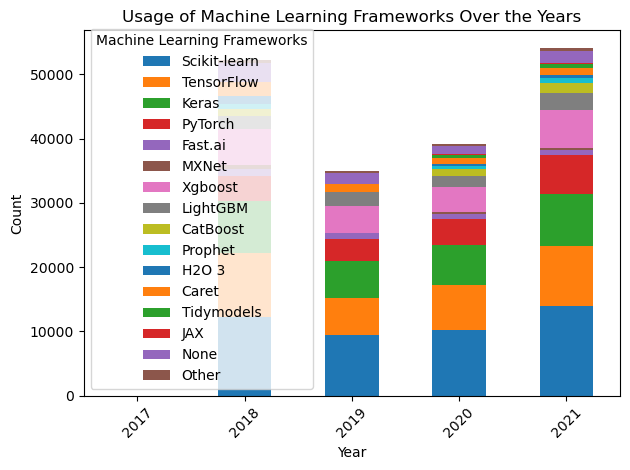

In [271]:
# Group by year and sum the counts of each programming language
grouped = ml_fw.groupby('Year').sum()

# Plotting
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', stacked=True)
plt.title('Usage of Machine Learning Frameworks Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Machine Learning Frameworks')
plt.tight_layout()
plt.show()

In [272]:
grouped.to_csv('chart_data/machine_learning_frameworks.csv')

#### 3.2 : ML Algorithms (Q17)

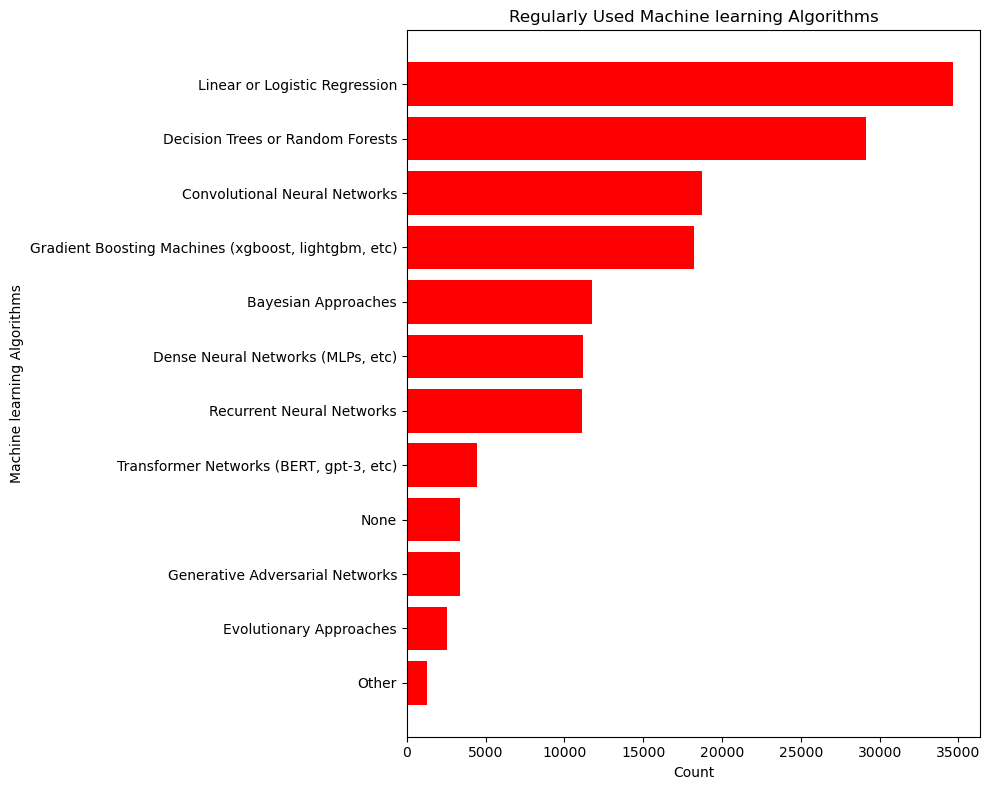

In [79]:
ml_algo = filter_column_data_with_question_num(17)
ml_algo = ml_algo.notnull().astype(int)
sum_binary_data_df_and_visualise_horizontal_bargraph(ml_algo, 'Count', 'Machine learning Algorithms', 'Regularly Used Machine learning Algorithms', color='red')

#### 3.3 Use of ML at work(Q23)

In [241]:
ml_use = pd.DataFrame(filter_column_data_with_question_num(23, year=True).value_counts()).reset_index()
ml_use.columns = ['Response', 'Year', 'Count']
# ml_use = ml_use.notnull().astype(int)
# sum_binary_data_df_and_visualise_horizontal_bargraph(ml_algo, 'Count', 'Machine learning Algorithms', 'Regularly Used Machine learning Algorithms', color='red')

In [243]:
def group_response(response):
    if response in ['We are exploring ML methods (and may one day put a model into production)',
       'We recently started using ML methods (i.e., models in production for less than 2 years)',
       'We have well established ML methods (i.e., models in production for more than 2 years)',
       'We use ML methods for generating insights (but do not put working models into production)']:
        return True
    elif response in [
       'No (we do not use ML methods)']:
        return False
    else:
        return 'Maybe'


In [244]:
ml_use['ResponseGroup'] = ml_use['Response'].apply(group_response)

In [245]:
ml_use

,Response,Year,Count,ResponseGroup
0,We are exploring ML methods (and may one day put a model into production),2018,4688,True
1,No (we do not use ML methods),2018,4411,False
2,"We recently started using ML methods (i.e., models in production for less than 2 years)",2018,3790,True
3,We are exploring ML methods (and may one day put a model into production),2021,3390,True
4,No (we do not use ML methods),2021,3263,False
5,I do not know,2018,2893,Maybe
6,We are exploring ML methods (and may one day put a model into production),2019,2812,True
7,"We have well established ML methods (i.e., models in production for more than 2 years)",2018,2782,True
8,"We recently started using ML methods (i.e., models in production for less than 2 years)",2019,2731,True
9,I do not know,2021,2712,Maybe


/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/3971430661.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



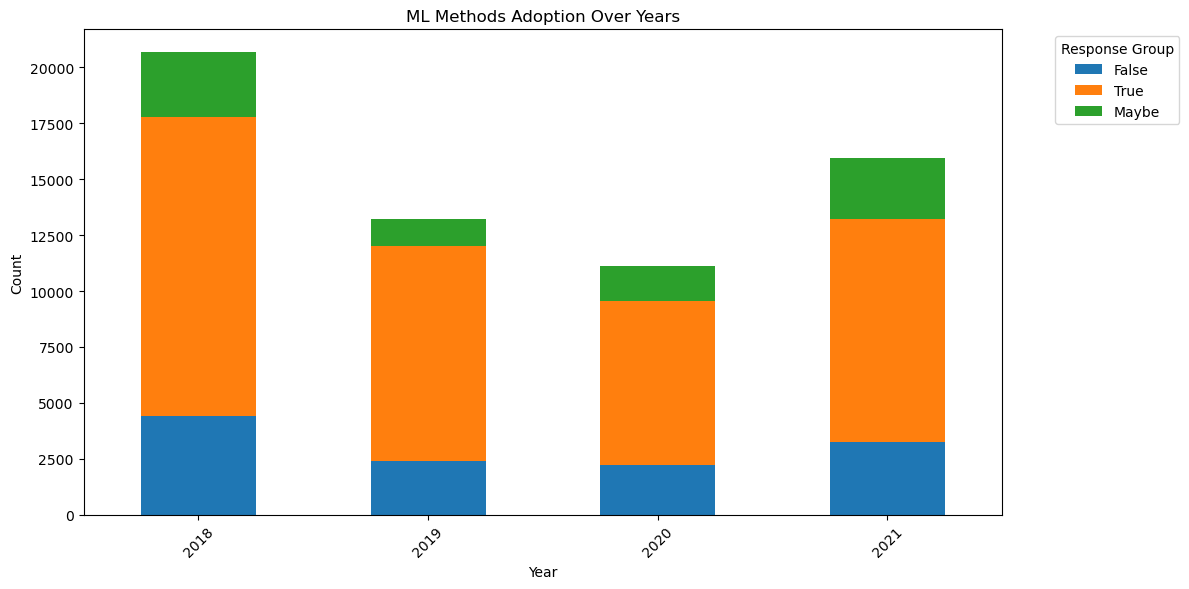

In [249]:
# Group by year and response, and sum the counts
grouped_df = ml_use.groupby(['Year', 'ResponseGroup']).sum().reset_index()

# Pivot table for easier plotting
pivot_df = grouped_df.pivot(index='Year', columns='ResponseGroup', values='Count').fillna(0)

# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('ML Methods Adoption Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 3.4 AutoML (Q36)

In [286]:
auto_ml = filter_column_data_with_question_num(36)
auto_ml

,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER
,"Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply) - Selected Choice - Automated data augmentation (e.g. imgaug, albumentations)","Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply) - Selected Choice - Automated feature engineering/selection (e.g. tpot, boruta_py)","Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply) - Selected Choice - Automated model selection (e.g. auto-sklearn, xcessiv)","Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply) - Selected Choice - Automated model architecture searches (e.g. darts, enas)","Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply) - Selected Choice - Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)","Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply) - Selected Choice - Automation of full ML pipelines (e.g. Google AutoML, H2O Driverless AI)",Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply) - Selected Choice - No / None,Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply) - Selected Choice - Other,"Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Automated data augmentation (e.g. imgaug, albumentations)","Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Automated feature engineering/selection (e.g. tpot, boruta_py)","Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Automated model selection (e.g. auto-sklearn, xcessiv)","Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Automated model architecture searches (e.g. darts, enas)","Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)","Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Automation of full ML pipelines (e.g. Google Cloud AutoML, H2O Driverless AI)",Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - None,Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Other
0,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, xcessiv)",NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, xcessiv)",NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,

In [287]:
auto_ml_parts = split_multiple_part_q_data_df(auto_ml)

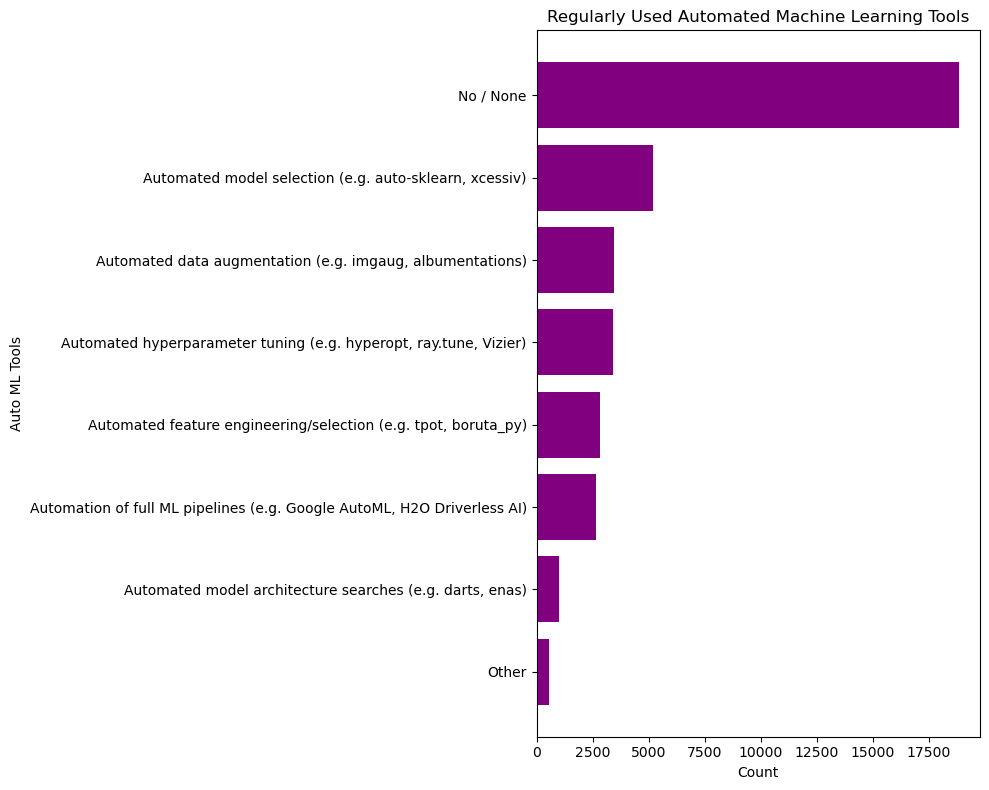

In [289]:
sum_binary_data_df_and_visualise_horizontal_bargraph(auto_ml_parts[0], 'Count', 'Auto ML Tools', 'Regularly Used Automated Machine Learning Tools', color='purple')

### Topic 4: Role and Responsibilities(Q24)

In [80]:
r_r = filter_column_data_with_question_num(24,year=True)
labels = get_choices(filter_column_data_with_question_num(24))
labels += ['Year']
labels

['Analyze and understand data to influence product or business decisions',
 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
 'Build prototypes to explore applying machine learning to new areas',
 'Build and/or run a machine learning service that operationally improves my product or workflows',
 'Experimentation and iteration to improve existing ML models',
 'Do research that advances the state of the art of machine learning',
 'None of these activities are an important part of my role at work',
 'Other',
 'Year']

In [150]:
r_r.columns = labels
r_r

,Analyze and understand data to influence product or business decisions,"Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Build prototypes to explore applying machine learning to new areas,Build and/or run a machine learning service that operationally improves my product or workflows,Experimentation and iteration to improve existing ML models,Do research that advances the state of the art of machine learning,None of these activities are an important part of my role at work,Other,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,None of these activities are an important part of my role at work,NaN,2021
1,NaN,"Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",NaN,NaN,NaN,NaN,NaN,NaN,2021
2,NaN,NaN,NaN,NaN,NaN,NaN,None of these activities are an important part of my role at work,NaN,2021
3,NaN,NaN,NaN,NaN,NaN,Do research that advances the state of the art of machine learning,NaN,NaN,2021
4,Analyze and understand data to influence product or business decisions,NaN,Build prototypes to explore applying machine learning to new areas,NaN,NaN,NaN,NaN,NaN,2021
...,...,...,...,...,...,...,...,...,...
106296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
106297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
106298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
106299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


In [155]:
overall = pd.DataFrame()
for year in r_r["Year"].unique():
    year_df = r_r[r_r['Year'] == year]
    year_df.drop(columns='Year', inplace=True)
    year_df = pd.DataFrame(year_df.notnull().astype(int).T.sum(axis=1)).reset_index()
    year_df.columns = ['Roles and Responsibilities', 'Count']
    year_df['year'] = year
    overall = pd.concat([overall, year_df])

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/1020777381.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/1020777381.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/1020777381.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipyker

In [158]:
overall.to_csv('chart_data/RolesAndResponsiblites.csv')

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/4244312583.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/4244312583.py:19: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



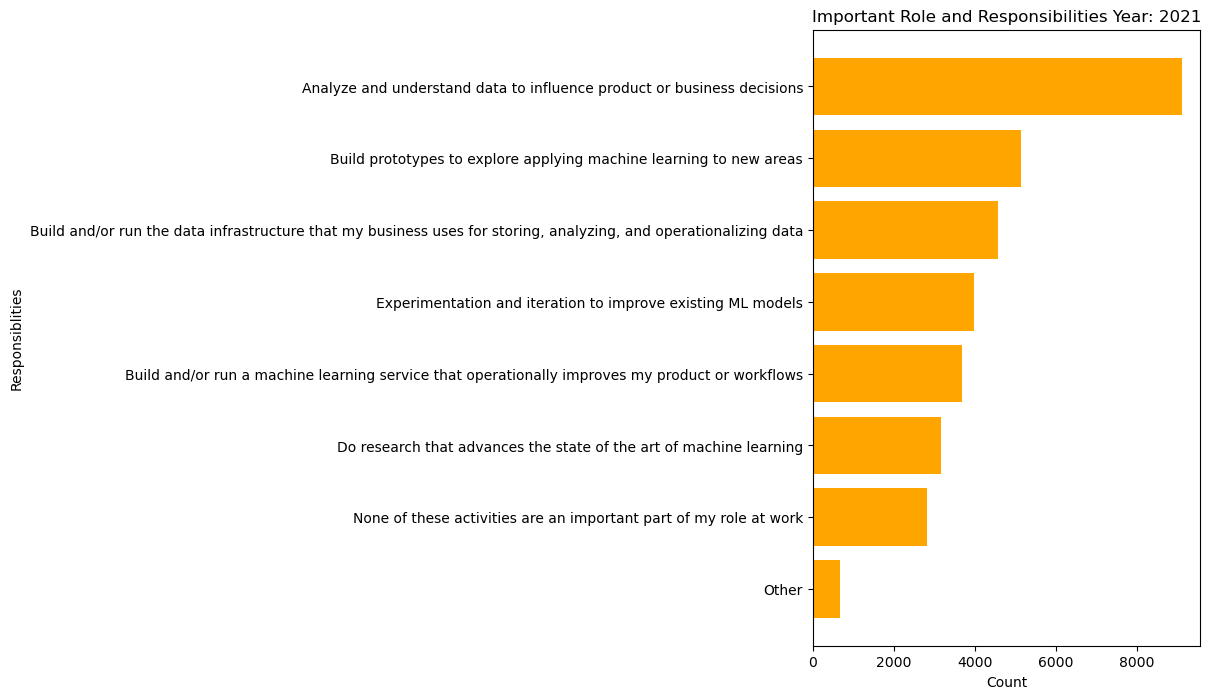

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/4244312583.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/4244312583.py:19: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



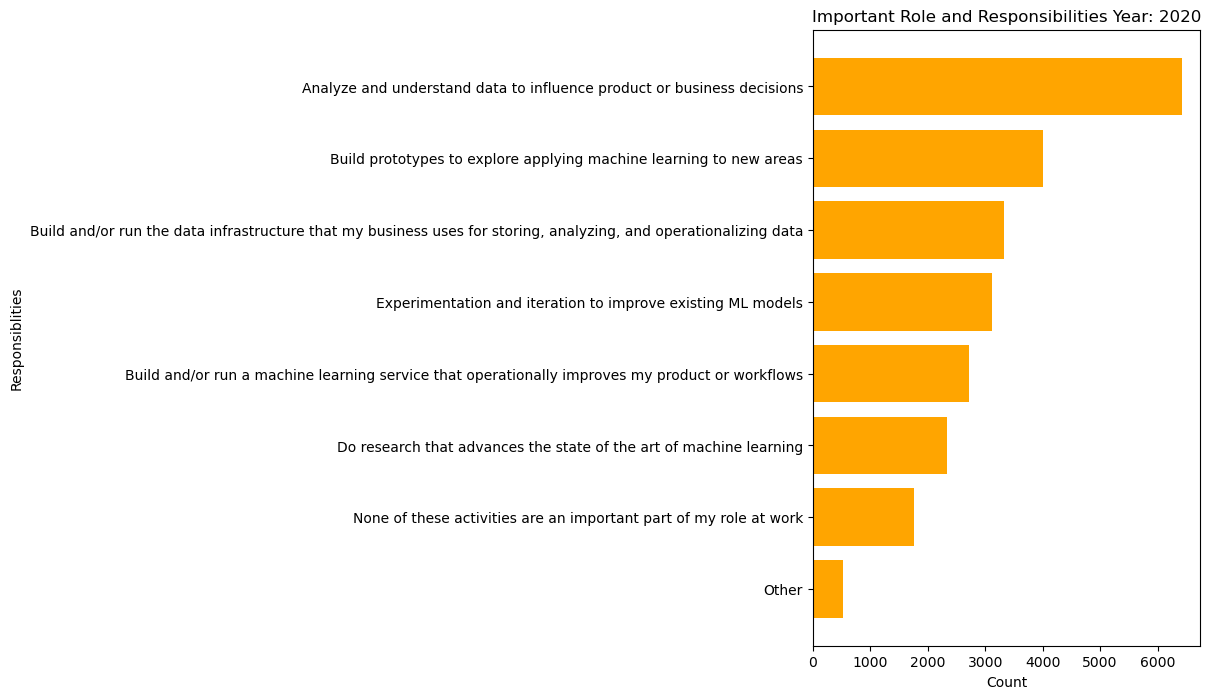

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/4244312583.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/4244312583.py:19: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



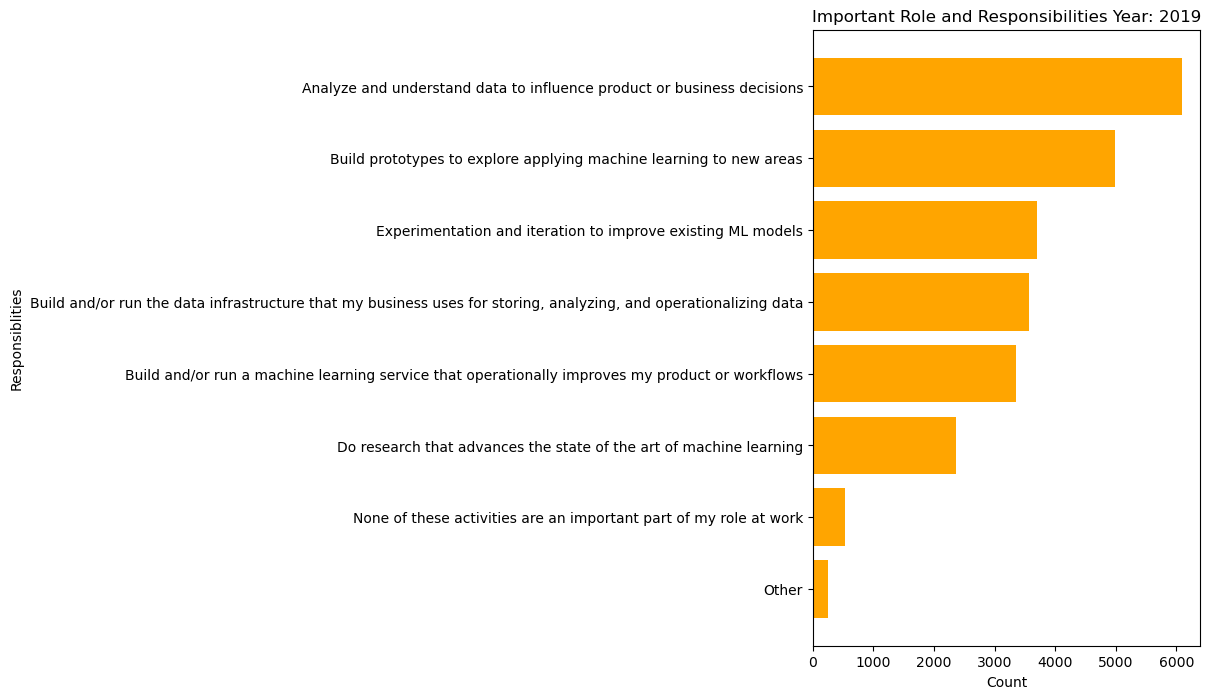

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/4244312583.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/4244312583.py:19: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



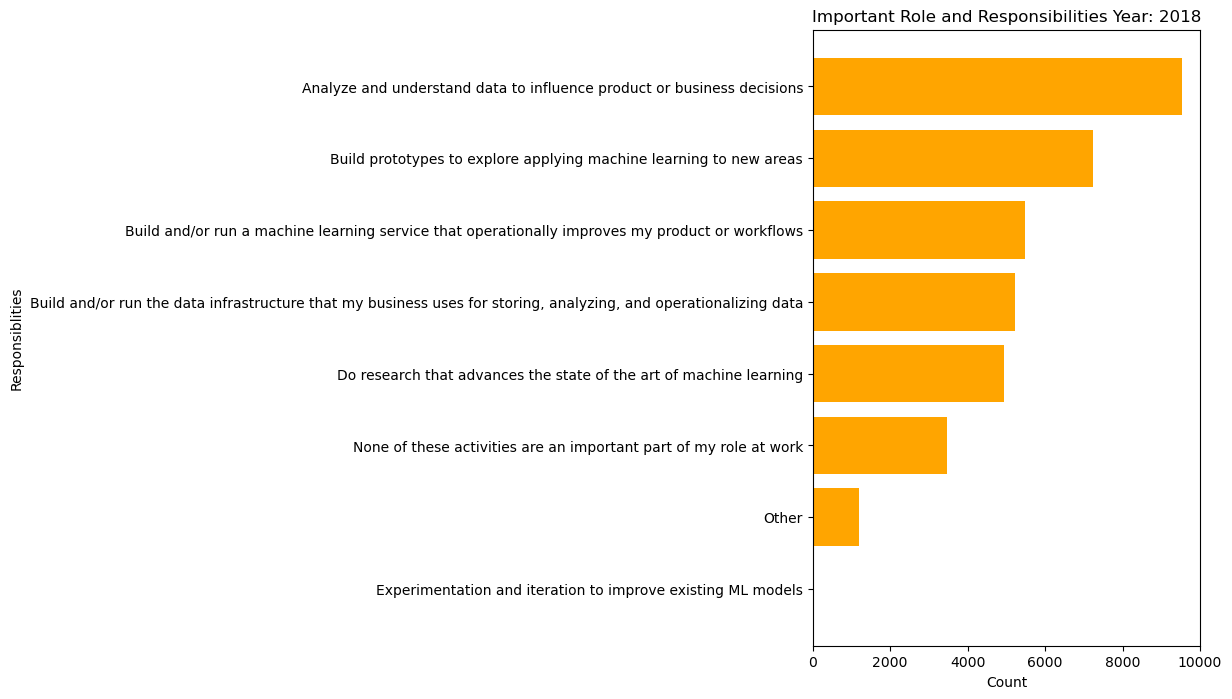

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/4244312583.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_87540/4244312583.py:19: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



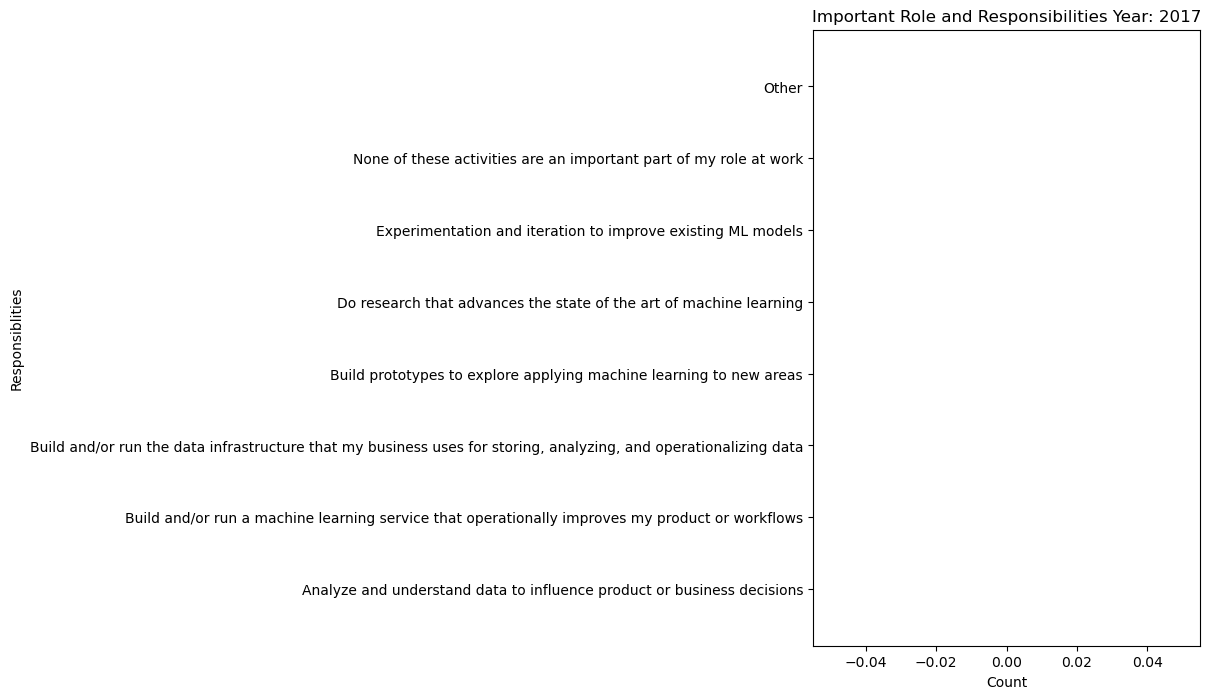

In [142]:
overall = pd.DataFrame()
for year in r_r["Year"].unique():
    year_df = r_r[r_r['Year'] == year]
    year_df.drop(columns='Year', inplace=True)
    year_df = year_df.notnull().astype(int).T.sum(axis=1)
    # year_df.index = ye?([year_df, overall])
    labels_ = labels[:-1]
    sorted_data = sorted(zip(year_df, labels_), reverse=False)

    # Unzip the sorted data
    sorted_sum_rowise, sorted_labels = zip(*sorted_data)

    # Create a horizontal bar plot with sorted row-wise sums
    plt.figure(figsize=(5, 8))
    plt.barh(sorted_labels, sorted_sum_rowise, color='orange')
    plt.xlabel('Count')
    plt.ylabel('Responsiblities')
    plt.title(f'Important Role and Responsibilities Year: {year}')
    plt.tight_layout()
    plt.show()
    # sum_binary_data_df_and_visualise_horizontal_bargraph(year_df, 'Count', 'Important Work at Role', f'Role and Responsibilities Year: {year}', color='red')
    # break